In [3]:
import pandas  as pd
import numpy as np

In [3]:
%%time
def concat_store_df():
    files = ! ls spb/data_2/*.xlsx
    dfs = []
    for file_path in files:
        print(file_path)
        dfs.append(pd.read_excel(file_path, engine='openpyxl'))


    header = ['Месяц', 'МНН', 'Нормализованное наименование формы выпуска ЛП',
           'Нормализованное наименование дозировки ЛП',
           'Количество первичной в потребительской упаковке',
           'Масса/объем в первичной упаковке', 'ЖНЛП', 'Ковид', 'Происхождение',
           'Код субъекта', 'Субъект', 'Количество']

    for file_path, df in zip(files, dfs):
        df.rename(columns={'Количество хранимой продукции (шт)': 'Количество', 
                 'Код субъекта РФ': 'Код субъекта', 
                 'Наименование субъекта РФ': 'Субъект', 
                 'Масса/объем в первичной уп-ке': 'Масса/объем в первичной упаковке'}, inplace=True)
        cur_cols = df.columns
        print(file_path, cur_cols)
        print('\t', set(header) - set(cur_cols))
        print('\t', set(cur_cols) - set(header))
        print()
        print()

    df = pd.concat(dfs, ignore_index=True)
    df.to_csv('spb/data_2/store_months.csv', index=False)

concat_store_df()

spb/data_2/Август 21.xlsx
spb/data_2/Апрель 21.xlsx
spb/data_2/Июль 21.xlsx
spb/data_2/Июнь 21.xlsx
spb/data_2/Май 21.xlsx
spb/data_2/Март 21.xlsx
spb/data_2/Октябрь 21.xlsx
spb/data_2/Сентябрь 21.xlsx
spb/data_2/Февраль 21.xlsx
spb/data_2/Январь 21.xlsx
spb/data_2/Август 21.xlsx Index(['Месяц', 'МНН', 'Нормализованное наименование формы выпуска ЛП',
       'Нормализованное наименование дозировки ЛП',
       'Количество первичной в потребительской упаковке',
       'Масса/объем в первичной упаковке', 'ЖНЛП', 'Ковид', 'Происхождение',
       'Код субъекта', 'Субъект', 'Количество'],
      dtype='object')
	 set()
	 set()


spb/data_2/Апрель 21.xlsx Index(['Месяц', 'МНН', 'Нормализованное наименование формы выпуска ЛП',
       'Нормализованное наименование дозировки ЛП',
       'Количество первичной в потребительской упаковке',
       'Масса/объем в первичной упаковке', 'ЖНЛП', 'Ковид', 'Происхождение',
       'Код субъекта', 'Субъект', 'Количество'],
      dtype='object')
	 set()
	 set()

In [30]:
set(sales['name']) ^ set(store['name'])

{'Байконур',
 'Кабардино-Балкарская Республика',
 'Кабардино-Балкарская республика',
 'Карачаево-Черкесская Республика',
 'Карачаево-Черкесская республика',
 'РФ',
 'Республика Адыгея',
 'Республика Адыгея (Адыгея)',
 'Республика Северная Осетия - Алания',
 'Республика Северная Осетия — Алания',
 'Республика Татарстан',
 'Республика Татарстан (Татарстан)',
 'Удмуртская Республика',
 'Удмуртская республика',
 'Чеченская Республика',
 'Чеченская республика',
 'Чувашская Республика - Чувашия',
 'Чувашская республика'}

In [34]:
set(sales['code']) - set(store['code'])

set()

In [41]:
names_store = store[['name', 'code']].rename(columns={'name': 'name_store'})
names_store.index = names_store.pop('code')
names_store_dict = names_store.to_dict()['name_store']

In [44]:
sales['name_store'] = sales['code'].apply(names_store_dict.get)

In [1]:
sales

NameError: name 'sales' is not defined

In [36]:
names_store = store[['name', 'code']].rename(columns={'name': 'name_store'}).to_dict()
names_store

{'name_store': {0: 'Владимирская область',
  1: 'Тюменская область',
  2: 'Забайкальский край',
  3: 'Самарская область',
  4: 'Новосибирская область',
  5: 'Республика Башкортостан',
  6: 'Тульская область',
  7: 'Новгородская область',
  8: 'Санкт-Петербург',
  9: 'Иркутская область',
  10: 'Кемеровская область',
  11: 'Сахалинская область',
  12: 'Воронежская область',
  13: 'Москва',
  14: 'Ярославская область',
  15: 'Санкт-Петербург',
  16: 'Курская область',
  17: 'Ленинградская область',
  18: 'Ростовская область',
  19: 'Владимирская область',
  20: 'Ульяновская область',
  21: 'Нижегородская область',
  22: 'Красноярский край',
  23: 'Республика Саха (Якутия)',
  24: 'Нижегородская область',
  25: 'Ставропольский край',
  26: 'Челябинская область',
  27: 'Удмуртская республика',
  28: 'Кировская область',
  29: 'Калужская область',
  30: 'Чувашская республика',
  31: 'Ленинградская область',
  32: 'Республика Северная Осетия — Алания',
  33: 'Московская область',
  34: 'Яросл

In [35]:
pd.merge(sales, store[['name', 'code']].rename(columns={'name': 'name_store'}), on='code')

MemoryError: Unable to allocate 5.05 TiB for an array with shape (693588040814,) and data type int64

In [4]:
sales = pd.read_csv('spb/data/result.csv', sep='#')
sales

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (0,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,year_,month_,prod_norm_name,prod_form_norm_name,prod_d_norm_name,prod_pack_1_2,prod_pack_1_size,ЖНВЛП,Ковид,origin,code,name,max_3,min_3,avg_3,Count_3
0,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,2.0,Республика Башкортостан,31650.0,31650.0,31650.0,3.0
1,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,14.0,Республика Саха (Якутия),NaN,NaN,NaN,NaN
2,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,15.0,Республика Северная Осетия - Алания,NaN,NaN,NaN,NaN
3,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,18.0,Удмуртская Республика,NaN,NaN,NaN,NaN
4,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,20.0,Чеченская Республика,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14121826,2021,9.0,МНН №222,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,250 мг,6.0,10.0,Нет,Нет,2.0,43.0,Кировская область,NaN,NaN,NaN,NaN
14121827,2021,9.0,МНН №222,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,250 мг,6.0,10.0,Нет,Нет,2.0,56.0,Оренбургская область,NaN,NaN,NaN,NaN
14121828,2021,9.0,МНН №222,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,250 мг,6.0,10.0,Нет,Нет,2.0,59.0,Пермский край,NaN,NaN,NaN,NaN
14121829,2021,9.0,МНН №222,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,250 мг,6.0,10.0,Нет,Нет,2.0,71.0,Тульская область,NaN,NaN,NaN,NaN


In [22]:
common

,month__x,name,Count_3_store,year_,prod_pack_1_size,ЖНВЛП,Ковид,origin,code,max_3,...,is_sales,name_store,month__y,Unnamed: 0,Выздоровлений,Заражений за день,Выздоровлений за день,Смертей за день,Смертей,"Летальность, %"
0,1.0,Алтайский край,2972571.0,33574873.0,8.831353e+07,9389.0,387.0,22336.0,365486.0,34845497.0,...,16613.0,Алтайский край,1.0,537340.0,1025215.0,6092.0,4507.0,309.0,32043.0,88.53
1,1.0,Алтайский край,2972571.0,33574873.0,8.831353e+07,9389.0,387.0,22336.0,365486.0,34845497.0,...,16613.0,Алтайский край,2.0,489391.0,1038982.0,4529.0,3782.0,316.0,38052.0,91.63
2,1.0,Алтайский край,2972571.0,33574873.0,8.831353e+07,9389.0,387.0,22336.0,365486.0,34845497.0,...,16613.0,Алтайский край,3.0,541844.0,1261244.0,3604.0,3313.0,330.0,51433.0,113.02
3,1.0,Алтайский край,2972571.0,33574873.0,8.831353e+07,9389.0,387.0,22336.0,365486.0,34845497.0,...,16613.0,Алтайский край,4.0,519872.0,1303729.0,2526.0,2335.0,231.0,58890.0,121.43
4,1.0,Алтайский край,2972571.0,33574873.0,8.831353e+07,9389.0,387.0,22336.0,365486.0,34845497.0,...,16613.0,Алтайский край,5.0,536884.0,1415186.0,1977.0,2019.0,238.0,67550.0,133.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8445,10.0,Республика Северная Осетия - Алания,NaN,33578915.0,8.831355e+07,9391.0,387.0,22338.0,249225.0,204973750.0,...,16615.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8446,10.0,Республика Татарстан (Татарстан),NaN,33578915.0,8.831355e+07,9391.0,387.0,22338.0,265840.0,257969267.0,...,16615.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8447,10.0,Удмуртская Республика,NaN,33578915.0,8.831355e+07,9391.0,387.0,22338.0,299070.0,231852985.0,...,16615.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8448,10.0,Чеченская Республика,NaN,33574873.0,8.831353e+07,9389.0,387.0,22336.0,332260.0,41470127.0,...,16613.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
store = pd.read_csv('spb/data_2/store_months.csv')
store

,Месяц,МНН,Нормализованное наименование формы выпуска ЛП,Нормализованное наименование дозировки ЛП,Количество первичной в потребительской упаковке,Масса/объем в первичной упаковке,ЖНЛП,Ковид,Происхождение,Код субъекта,Субъект,Количество
0,8,МНН №1,МАЗЬ НАЗАЛЬНАЯ,0.25 %,1,10.0,0,0,Отечественное,33,Владимирская область,2767
1,8,МНН №9,КАПЛИ ГЛАЗНЫЕ,20 %,1,10.0,0,0,Отечественное,72,Тюменская область,1981
2,8,МНН №9,КАПЛИ ГЛАЗНЫЕ,20 %,1,10.0,0,0,Отечественное,75,Забайкальский край,1106
3,8,МНН №14,КАПЛИ ГЛАЗНЫЕ,0.007 %,1,5.0,0,0,Отечественное,63,Самарская область,156
4,8,МНН №32,ГЕЛЬ ДЛЯ НАРУЖНОГО ПРИМЕНЕНИЯ,0.1 %,1,30.0,0,0,Иностранное,54,Новосибирская область,588
...,...,...,...,...,...,...,...,...,...,...,...,...
4217732,1,МНН №1189,РАСТВОР ДЛЯ ИНЪЕКЦИЙ,1 мг/мл,5,1.0,1,0,Отечественное,56,Оренбургская область,1
4217733,1,МНН №334,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,100 мг,1,20.0,0,0,Отечественное,9,Карачаево-Черкесская республика,1
4217734,1,МНН №299,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,50 мг,3,4.0,0,0,Иностранное,32,Брянская область,1
4217735,1,МНН №408,ТАБЛЕТКИ ДИСПЕРГИРУЕМЫЕ,200 мг,2,10.0,0,0,Отечественное,17,Республика Тыва,1


In [135]:
store.groupby('prod_norm_name')['Count_3'].sum().sort_values(ascending=False)

prod_norm_name
МНН №58      248871289.0
МНН №162     116700681.0
МНН №704     109185171.0
МНН №253      97153831.0
МНН №140      78443578.0
                ...     
МНН №1353            0.0
МНН №1718            0.0
МНН №1879            0.0
МНН №1878            0.0
МНН №999             0.0
Name: Count_3, Length: 1712, dtype: float64

In [6]:
# df = df.sort_values(['Месяц', 'Субъект'])
# df

In [7]:
# df.query('Ковид == 1 and Субъект == "Алтайский край"')

In [8]:
# df.query('МНН == "МНН №806" and Субъект == "Алтайский край" and Ковид == 1').groupby('Месяц').sum()['Количество'].plot();

In [9]:
# result.query('prod_norm_name == "МНН №806" and name == "Алтайский край"')

In [ ]:
# {'МНН': 'prod_norm_name', 
#  'Нормализованное наименование дозировки ЛП': 'prod_d_norm_name',
#  'Количество первичной в потребительской упаковке': 'prod_pack_1_2',
#  'Масса/объем в первичной упаковке': 'prod_pack_1_size',
#  'Происхождение': 'origin'
# }

# origin 1 - Russia
#        2 - Foreign
# Ковид
# Происхождение
# 

# df Происхождение (Отечественное, Иностранное) -> (1, 2) # store
# df (Количество Count_3)

# result ЖНВЛ (Да, Нет) -> (1, 0) # sales
# result Ковид (Да, Нет) -> (1, 0) # sales

In [ ]:
# result['year_'] = 2021

In [174]:
# result['year_'].unique()

In [18]:
sales.columns

Index(['Unnamed: 0', 'month_', 'prod_norm_name', 'prod_form_norm_name',
       'prod_d_norm_name', 'prod_pack_1_2', 'prod_pack_1_size', 'ЖНВЛП',
       'Ковид', 'origin', 'code', 'name', 'Count_3',
       'Масса/объем в первичной уп-ке', 'Код субъекта РФ',
       'Наименование субъекта РФ', 'Количество хранимой продукции (шт)',
       'is_sales'],
      dtype='object')

In [19]:
store.columns

Index(['year_', 'month_', 'prod_norm_name', 'prod_form_norm_name',
       'prod_d_norm_name', 'prod_pack_1_2', 'prod_pack_1_size', 'ЖНВЛП',
       'Ковид', 'origin', 'code', 'name', 'max_3', 'min_3', 'avg_3',
       'Count_3'],
      dtype='object')

In [12]:
# prepare store
def prepare_store_df(df):
    df['is_sales'] = False
    df.rename(columns={
                       'Нормализованное наименование формы выпуска ЛП': 'prod_form_norm_name',
                       'Месяц': 'month_',
                       'МНН': 'prod_norm_name',
                       'Код субъекта': 'code',
                       'Субъект': 'name',
                       'Количество': 'Count_3',
                         'Происхождение': 'origin',
                         'Нормализованное наименование дозировки ЛП': 'prod_d_norm_name',
                         'Количество первичной в потребительской упаковке': 'prod_pack_1_2',
                         'Масса/объем в первичной упаковке': 'prod_pack_1_size',
                        'ЖНЛП': 'ЖНВЛП'
                      }, inplace=True)
    
#     df Происхождение (Отечественное, Иностранное) -> (1, 2) # store
    df['origin'] = df['origin'].replace({'Отечественное': 1, 'Иностранное': 2})
    df['year_'] = 2021
    return df

store = prepare_store_df(store)

In [13]:
store

,month_,prod_norm_name,prod_form_norm_name,prod_d_norm_name,prod_pack_1_2,prod_pack_1_size,ЖНВЛП,Ковид,origin,code,name,Count_3,is_sales,year_
0,8,МНН №1,МАЗЬ НАЗАЛЬНАЯ,0.25 %,1,10.0,0,0,1,33,Владимирская область,2767,False,2021
1,8,МНН №9,КАПЛИ ГЛАЗНЫЕ,20 %,1,10.0,0,0,1,72,Тюменская область,1981,False,2021
2,8,МНН №9,КАПЛИ ГЛАЗНЫЕ,20 %,1,10.0,0,0,1,75,Забайкальский край,1106,False,2021
3,8,МНН №14,КАПЛИ ГЛАЗНЫЕ,0.007 %,1,5.0,0,0,1,63,Самарская область,156,False,2021
4,8,МНН №32,ГЕЛЬ ДЛЯ НАРУЖНОГО ПРИМЕНЕНИЯ,0.1 %,1,30.0,0,0,2,54,Новосибирская область,588,False,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4217732,1,МНН №1189,РАСТВОР ДЛЯ ИНЪЕКЦИЙ,1 мг/мл,5,1.0,1,0,1,56,Оренбургская область,1,False,2021
4217733,1,МНН №334,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,100 мг,1,20.0,0,0,1,9,Карачаево-Черкесская республика,1,False,2021
4217734,1,МНН №299,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,50 мг,3,4.0,0,0,2,32,Брянская область,1,False,2021
4217735,1,МНН №408,ТАБЛЕТКИ ДИСПЕРГИРУЕМЫЕ,200 мг,2,10.0,0,0,1,17,Республика Тыва,1,False,2021


In [140]:
store.query('prod_norm_name == "МНН №58"')

,year_,month_,prod_norm_name,prod_form_norm_name,prod_d_norm_name,prod_pack_1_2,prod_pack_1_size,ЖНВЛП,Ковид,origin,code,name,max_3,min_3,avg_3,Count_3,is_sales,mnn_index
664319,2021,1.0,МНН №58,КАПЛИ НАЗАЛЬНЫЕ,0.05 %,1,10.0,1.0,0.0,1.0,3.0,Республика Бурятия,3480.0,3120.0,3190.0,62.0,False,МНН №58_КАПЛИ НАЗАЛЬНЫЕ
664320,2021,1.0,МНН №58,КАПЛИ НАЗАЛЬНЫЕ,0.05 %,1,10.0,1.0,0.0,1.0,10.0,Республика Карелия,NaN,NaN,NaN,NaN,False,МНН №58_КАПЛИ НАЗАЛЬНЫЕ
664321,2021,1.0,МНН №58,КАПЛИ НАЗАЛЬНЫЕ,0.05 %,1,10.0,1.0,0.0,1.0,12.0,Республика Марий Эл,NaN,NaN,NaN,NaN,False,МНН №58_КАПЛИ НАЗАЛЬНЫЕ
664322,2021,1.0,МНН №58,КАПЛИ НАЗАЛЬНЫЕ,0.05 %,1,10.0,1.0,0.0,1.0,31.0,Белгородская область,5500.0,2405.0,3410.0,65.0,False,МНН №58_КАПЛИ НАЗАЛЬНЫЕ
664323,2021,1.0,МНН №58,КАПЛИ НАЗАЛЬНЫЕ,0.05 %,1,10.0,1.0,0.0,1.0,46.0,Курская область,3800.0,2405.0,3383.0,243.0,False,МНН №58_КАПЛИ НАЗАЛЬНЫЕ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13379426,2021,9.0,МНН №58,СПРЕЙ НАЗАЛЬНЫЙ ДОЗИРОВАННЫЙ,90 мкг/доза,1,15.0,1.0,0.0,2.0,49.0,Магаданская область,43698.0,7283.0,14566.0,1818.0,False,МНН №58_СПРЕЙ НАЗАЛЬНЫЙ ДОЗИРОВАННЫЙ
13379447,2021,9.0,МНН №58,СПРЕЙ НАЗАЛЬНЫЙ ДОЗИРОВАННЫЙ,90 мкг/доза,1,15.0,1.0,0.0,2.0,51.0,Мурманская область,14100.0,5874.5,11749.0,1807.0,False,МНН №58_СПРЕЙ НАЗАЛЬНЫЙ ДОЗИРОВАННЫЙ
13379448,2021,9.0,МНН №58,СПРЕЙ НАЗАЛЬНЫЙ ДОЗИРОВАННЫЙ,90 мкг/доза,1,15.0,1.0,0.0,2.0,64.0,Саратовская область,54273.0,9045.5,18091.0,1568.0,False,МНН №58_СПРЕЙ НАЗАЛЬНЫЙ ДОЗИРОВАННЫЙ
13379449,2021,9.0,МНН №58,СПРЕЙ НАЗАЛЬНЫЙ ДОЗИРОВАННЫЙ,90 мкг/доза,1,15.0,1.0,0.0,2.0,68.0,Тамбовская область,60795.0,10132.5,20265.0,3291.0,False,МНН №58_СПРЕЙ НАЗАЛЬНЫЙ ДОЗИРОВАННЫЙ


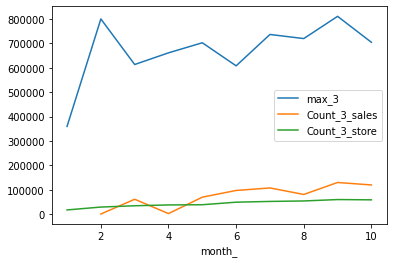

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline
# mnn = 'МНН №222'
# mnn_type = 'ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ'

# mnn = 'МНН №58'
mnn = 'МНН №162'
# mnn_type = 'КАПЛИ НАЗАЛЬНЫЕ'


# prod_norm_name
# МНН №58      248871289.0
# МНН №162     116700681.0
# МНН №704     109185171.0
# МНН №253      97153831.0
# МНН №140      78443578.0

# prod_pack_1_2_count = 1

name_region = 'Республика Бурятия'

tmp = store.query(
     'prod_norm_name == @mnn \
             and name == @name_region'
 ).sort_values('month_')

tmp.index = tmp['month_'].values.tolist()
(tmp.groupby('month_').sum()['max_3']).plot(label='max_3');
tmp.groupby('month_').sum()['Count_3'].shift(1).plot(label='Count_3_sales');

tmp2 = sales.query(
     'prod_norm_name == @mnn \
             and name == @name_region'
 ).sort_values('month_')
tmp2.index = tmp2['month_'].values.tolist()
tmp2.groupby('month_').sum()['Count_3'].plot(label='Count_3_store');

# tmp2.groupby('month_').sum()['Count_3'].diff().plot(label='Count_3_store');
plt.legend();

In [172]:
sales.query('Count_3 == 1 and Ковид and ЖНВЛП')

,month_,prod_norm_name,prod_form_norm_name,prod_d_norm_name,prod_pack_1_2,prod_pack_1_size,ЖНВЛП,Ковид,origin,code,name,Count_3,is_sales,year_,mnn_index
1937,8,МНН №269,РАСТВОР ДЛЯ ИНЪЕКЦИЙ,4 мг/мл,25,2.0,1,1,Отечественное,59,Пермский край,1,True,2021,МНН №269_РАСТВОР ДЛЯ ИНЪЕКЦИЙ
6868,8,МНН №806,ЛИОФИЛИЗАТ ДЛЯ ПРИГОТОВЛЕНИЯ СУСПЕНЗИИ ДЛЯ ПРИ...,500 тыс.МЕ,6,0.5,1,1,Отечественное,65,Сахалинская область,1,True,2021,МНН №806_ЛИОФИЛИЗАТ ДЛЯ ПРИГОТОВЛЕНИЯ СУСПЕНЗИ...
7149,8,МНН №720,КАПСУЛЫ,50 мг,1,10.0,1,1,Отечественное,47,Ленинградская область,1,True,2021,МНН №720_КАПСУЛЫ
7168,8,МНН №269,РАСТВОР ДЛЯ ИНЪЕКЦИЙ,4 мг/мл,25,2.0,1,1,Отечественное,43,Кировская область,1,True,2021,МНН №269_РАСТВОР ДЛЯ ИНЪЕКЦИЙ
9328,8,МНН №4,МАЗЬ ГЛАЗНАЯ,2.5 %,1,2.5,1,1,Иностранное,48,Липецкая область,1,True,2021,МНН №4_МАЗЬ ГЛАЗНАЯ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4216040,1,МНН №266,РАСТВОР ДЛЯ ИНГАЛЯЦИЙ,0.5 мг/мл,10,2.0,1,1,Отечественное,61,Ростовская область,1,True,2021,МНН №266_РАСТВОР ДЛЯ ИНГАЛЯЦИЙ
4216107,1,МНН №178,РАСТВОР ДЛЯ ИНЪЕКЦИЙ,8000 анти-Ха МЕ/0.8 мл,10,0.8,1,1,Отечественное,75,Забайкальский край,1,True,2021,МНН №178_РАСТВОР ДЛЯ ИНЪЕКЦИЙ
4216182,1,МНН №269,РАСТВОР ДЛЯ ИНЪЕКЦИЙ,4 мг/мл,25,1.0,1,1,Отечественное,89,Ямало-Ненецкий автономный округ,1,True,2021,МНН №269_РАСТВОР ДЛЯ ИНЪЕКЦИЙ
4217700,1,МНН №806,ЛИОФИЛИЗАТ ДЛЯ ПРИГОТОВЛЕНИЯ РАСТВОРА ДЛЯ ИНЪЕ...,1 млн.МЕ,5,1000000.0,1,1,Отечественное,52,Нижегородская область,1,True,2021,МНН №806_ЛИОФИЛИЗАТ ДЛЯ ПРИГОТОВЛЕНИЯ РАСТВОРА...


In [175]:
sales.query('Count_3 == 1 and Ковид and ЖНВЛП').groupby('name').count()['month_'].sort_values(ascending=False)

name
РФ                                 79
Оренбургская область               79
Кабардино-Балкарская республика    75
Мурманская область                 74
Республика Алтай                   74
                                   ..
Удмуртская республика              19
Свердловская область               17
Байконур                           16
Краснодарский край                 14
Московская область                 13
Name: month_, Length: 87, dtype: int64

In [176]:
tmp_df = sales.query('Count_3 == 1 and Ковид and ЖНВЛП')
for mnn in tmp_df['prod_norm_name'].tolist():
    tmp_mnn = tmp_df.query('prod_norm_name == @mnn and name == "Оренбургская область"').groupby('month_').sum()
    count_3_8 = tmp_mnn.query('month_ == 8')['Count_3'].values[0]
    count_3_7 = tmp_mnn.query('month_ == 7')['Count_3'].values[0]
    if count_3_7 > count_3_8:
        print(mnn)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [11]:
%%time
# prepare result
def prepare_sales_df(df):
#     result ЖНВЛ (Да, Нет) -> (1, 0) # sales
#     result Ковид (Да, Нет) -> (1, 0) # sales
    print('old shape', df.shape)
    df = df.query('year_ in [2021, "2021"]')
    print('new shape', df.shape)
    df['year_'] = 2021
    df['ЖНВЛП'] = df['ЖНВЛП'].replace('Да', 1).replace('Нет', 0)
    df['Ковид'] = df['Ковид'].replace('Да', 1).replace('Нет', 0)
    df = df.query('year_ != "(14121830 row(s) affected)"')
    df['year_'] = 2021
    df['is_sales'] = True
    return df

sales = prepare_sales_df(sales)

old shape (14121831, 16)
new shape (14121830, 16)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

CPU times: user 8.09 s, sys: 2.3 s, total: 10.4 s
Wall time: 10.4 s


In [14]:
store.to_csv('spb/data_2/store_cleaned.csv', index=False)

In [46]:
sales.to_csv('spb/data_2/sales_cleaned.csv', index=False)

In [4]:
sales = pd.read_csv('spb/data_2/sales_cleaned.csv')
sales['name'] = sales.pop('name_store')
store = pd.read_csv('spb/data_2/store_cleaned.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
sales.head()

In [6]:
mnn_used = {'МНН №269', 'МНН №382', 'МНН №2136', 'МНН №266', 'МНН №806',
       'МНН №1132', 'МНН №1532', 'МНН №1207', 'МНН №138', 'МНН №720',
       'МНН №360', 'МНН №178', 'МНН №4', 'МНН №2200', 'МНН №1335',
       'МНН №1795', 'МНН №1725', 'МНН №1922', 'МНН №865', 'МНН №1774'}

In [19]:
sales.head()

,year_,month_,prod_norm_name,prod_form_norm_name,prod_d_norm_name,prod_pack_1_2,prod_pack_1_size,ЖНВЛП,Ковид,origin,code,name,max_3,min_3,avg_3,Count_3,is_sales
0,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,0,0,2.0,2.0,Республика Башкортостан,31650.0,31650.0,31650.0,3.0,True
1,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,0,0,2.0,14.0,Республика Саха (Якутия),NaN,NaN,NaN,NaN,True
2,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,0,0,2.0,15.0,Республика Северная Осетия — Алания,NaN,NaN,NaN,NaN,True
3,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,0,0,2.0,18.0,Удмуртская республика,NaN,NaN,NaN,NaN,True
4,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,0,0,2.0,20.0,Чеченская республика,NaN,NaN,NaN,NaN,True


In [23]:
sales.query('prod_norm_name in @mnn_used and Ковид == 1')['Count_3'].sum() / sales.query('Ковид == 1')['Count_3'].sum()

0.9951680446470449

In [25]:
sales.query('prod_norm_name in @mnn_used and Ковид == 1')['Count_3'].sum(), sales.query('Ковид == 1')['Count_3'].sum()

(231468093.0, 232591967.0)

In [26]:
store.query('prod_norm_name in @mnn_used and Ковид == 1')['Count_3'].sum() / store.query('Ковид == 1')['Count_3'].sum()

0.999840481813154

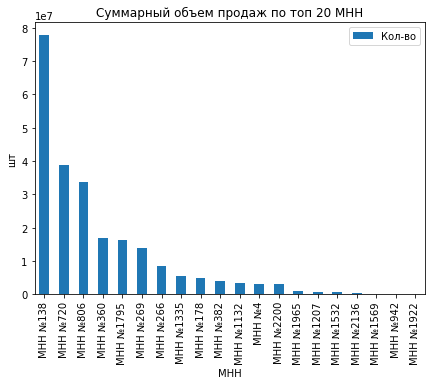

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(7, 5))
sales.query('Ковид == 1').groupby('prod_norm_name')['Count_3'].sum().sort_values(ascending=False).head(20) \
.plot(kind='bar', label='Кол-во', ax=plt.gca());
plt.title('Суммарный объем продаж по топ 20 МНН')
plt.xlabel('МНН')
plt.ylabel('шт')
plt.legend();

In [65]:
geo = pd.merge(pd.read_csv('spb/common_per_region.csv'), 
         pd.read_csv('spb/names_all.csv'), on='name_store')
geo['lat'] = geo['lat_lon_name_covid'].apply(lambda x: eval(x)[0])
geo['lon'] = geo['lat_lon_name_covid'].apply(lambda x: eval(x)[1])

In [66]:
geo.to_csv('spb/common_per_region_lat_lon.csv', index=False)

In [38]:
sales.query('Ковид == 1').groupby('prod_norm_name')['Count_3'].sum().sort_values(ascending=False).head(60).keys()

Index(['МНН №138', 'МНН №720', 'МНН №806', 'МНН №360', 'МНН №1795', 'МНН №269',
       'МНН №266', 'МНН №1335', 'МНН №178', 'МНН №382', 'МНН №1132', 'МНН №4',
       'МНН №2200', 'МНН №1965', 'МНН №1207', 'МНН №1532', 'МНН №2136',
       'МНН №1569', 'МНН №942', 'МНН №1922', 'МНН №1725', 'МНН №771',
       'МНН №166', 'МНН №1864', 'МНН №865', 'МНН №1726', 'МНН №2108',
       'МНН №1818', 'МНН №1774', 'МНН №1363', 'МНН №1239', 'МНН №1229'],
      dtype='object', name='prod_norm_name')

In [39]:
top_30_by_volume = {'МНН №138', 'МНН №720', 'МНН №806', 'МНН №360', 'МНН №1795', 'МНН №269',
       'МНН №266', 'МНН №1335', 'МНН №178', 'МНН №382', 'МНН №1132', 'МНН №4',
       'МНН №2200', 'МНН №1965', 'МНН №1207', 'МНН №1532', 'МНН №2136',
       'МНН №1569', 'МНН №942', 'МНН №1922', 'МНН №1725', 'МНН №771',
       'МНН №166', 'МНН №1864', 'МНН №865', 'МНН №1726', 'МНН №2108',
       'МНН №1818', 'МНН №1774', 'МНН №1363', 'МНН №1239', 'МНН №1229'}

In [42]:
mnn_used - top_30_by_volume

set()

In [11]:
231468093.0 / 5610146123.0

0.041258834961721724

In [18]:
sorted(sales['month_'].unique())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [19]:
sorted(store['month_'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [80]:
sales['mnn_index'] = sales['prod_norm_name'] + '_' + sales['prod_form_norm_name']
store['mnn_index'] = store['prod_norm_name'] + '_' + store['prod_form_norm_name']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [83]:
len(set(sales['mnn_index'])), len(set(store['mnn_index']))

(2954, 3826)

In [6]:
common_mnn_inds = set(sales['mnn_index']) & set(store['mnn_index'])
len(common_mnn_inds)

KeyError: 'mnn_index'

In [86]:
print(sales.shape, store.shape)
sales = sales.query('mnn_index in @common_mnn_inds')
store = store.query('mnn_index in @common_mnn_inds')
print(sales.shape, store.shape)

(4217737, 15) (14121830, 18)
(4143606, 15) (12382730, 18)


In [94]:
store.query('max_3 > 0')

,year_,month_,prod_norm_name,prod_form_norm_name,prod_d_norm_name,prod_pack_1_2,prod_pack_1_size,ЖНВЛП,Ковид,origin,code,name,max_3,min_3,avg_3,Count_3,is_sales,mnn_index
2282,2021,1.0,МНН №1317,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,600 мг,1,30.0,1.0,0.0,1.0,50.0,Московская область,154500.0,154500.0,154500.0,3.0,False,МНН №1317_ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ
2286,2021,1.0,МНН №1317,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,600 мг,1,30.0,1.0,0.0,1.0,77.0,Москва,154500.0,154500.0,154500.0,78.0,False,МНН №1317_ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ
3358,2021,1.0,МНН №1549,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,25 мг,2,14.0,1.0,0.0,1.0,23.0,Краснодарский край,167800.0,156200.0,162925.0,4.0,False,МНН №1549_ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ
3359,2021,1.0,МНН №1549,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,25 мг,2,14.0,1.0,0.0,1.0,40.0,Калужская область,143450.0,136004.0,140951.0,56.0,False,МНН №1549_ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ
3361,2021,1.0,МНН №1549,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,25 мг,2,14.0,1.0,0.0,1.0,61.0,Ростовская область,148100.0,145726.0,146676.0,10.0,False,МНН №1549_ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14121804,2021,9.0,МНН №222,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,250 мг,18.0,10.0,0.0,0.0,2.0,3.0,Республика Бурятия,494600.0,494600.0,494600.0,2.0,False,МНН №222_ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ
14121809,2021,9.0,МНН №222,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,250 мг,18.0,10.0,0.0,0.0,2.0,53.0,Новгородская область,471500.0,437000.0,454250.0,14.0,False,МНН №222_ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ
14121810,2021,9.0,МНН №222,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,250 мг,18.0,10.0,0.0,0.0,2.0,60.0,Псковская область,471500.0,437000.0,454250.0,10.0,False,МНН №222_ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ
14121815,2021,9.0,МНН №222,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,250 мг,4.0,15.0,0.0,0.0,1.0,47.0,Ленинградская область,187100.0,187100.0,187100.0,10.0,False,МНН №222_ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ


In [11]:
store['prod_d_norm_name'].replace({'НЕ УКАЗАНО': np.NaN}).isnull().sum()

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
             ...  
14121826    250 мг
14121827    250 мг
14121828    250 мг
14121829    250 мг
14121830       NaN
Name: prod_d_norm_name, Length: 14121831, dtype: object

In [14]:
store['prod_d_norm_name'].nunique()

1342

In [74]:
store['prod_d_norm_name'].value_counts()

НЕ УКАЗАНО             1255450
10 мг                   588200
100 мг                  583100
50 мг                   458150
500 мг                  423300
                        ...   
100 ЕД/мл+33 мкг/мл        850
100 ЕД/мл+50 мкг/мл        850
100 ЕД+0.05 мг/мл          850
100 ЕД/мл+3.6 мг/мл        850
200 мг/10 мл               850
Name: prod_d_norm_name, Length: 1342, dtype: int64

In [73]:
sales['prod_d_norm_name'].isnull().sum()

0

In [182]:
result['ЖНВЛП'].value_counts()

Да     7981430
Нет    6140400
Name: ЖНВЛП, dtype: int64

old shape (14121831, 16)
new shape (14121830, 16)


In [175]:
result.head()

,year_,month_,prod_norm_name,prod_form_norm_name,prod_d_norm_name,prod_pack_1_2,prod_pack_1_size,ЖНВЛП,Ковид,origin,code,name,max_3,min_3,avg_3,Count_3
0,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,2.0,Республика Башкортостан,31650.0,31650.0,31650.0,3.0
1,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,14.0,Республика Саха (Якутия),NaN,NaN,NaN,NaN
2,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,15.0,Республика Северная Осетия - Алания,NaN,NaN,NaN,NaN
3,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,18.0,Удмуртская Республика,NaN,NaN,NaN,NaN
4,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,20.0,Чеченская Республика,NaN,NaN,NaN,NaN


In [173]:
result['origin'].value_counts()

1.0    9257280
2.0    4864550
Name: origin, dtype: int64

In [157]:
set(df.columns) & set(result.columns)

{'Count_3',
 'code',
 'month_',
 'name',
 'origin',
 'prod_d_norm_name',
 'prod_form_norm_name',
 'prod_norm_name',
 'prod_pack_1_2',
 'prod_pack_1_size',
 'ЖНВЛП',
 'Ковид'}

In [158]:
result

,year_,month_,prod_norm_name,prod_form_norm_name,prod_d_norm_name,prod_pack_1_2,prod_pack_1_size,ЖНВЛП,Ковид,origin,code,name,max_3,min_3,avg_3,Count_3
0,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,2.0,Республика Башкортостан,31650.0,31650.0,31650.0,3.0
1,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,14.0,Республика Саха (Якутия),NaN,NaN,NaN,NaN
2,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,15.0,Республика Северная Осетия - Алания,NaN,NaN,NaN,NaN
3,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,18.0,Удмуртская Республика,NaN,NaN,NaN,NaN
4,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,20.0,Чеченская Республика,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14121826,2021,9.0,МНН №222,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,250 мг,6.0,10.0,Нет,Нет,2.0,43.0,Кировская область,NaN,NaN,NaN,NaN
14121827,2021,9.0,МНН №222,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,250 мг,6.0,10.0,Нет,Нет,2.0,56.0,Оренбургская область,NaN,NaN,NaN,NaN
14121828,2021,9.0,МНН №222,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,250 мг,6.0,10.0,Нет,Нет,2.0,59.0,Пермский край,NaN,NaN,NaN,NaN
14121829,2021,9.0,МНН №222,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,250 мг,6.0,10.0,Нет,Нет,2.0,71.0,Тульская область,NaN,NaN,NaN,NaN


In [153]:
set(df.columns) ^ set(result.columns)

{'avg_3', 'is_sales', 'max_3', 'min_3', 'year_', 'ЖНВЛП', 'ЖНЛП'}

In [143]:
df

,month_,prod_norm_name,prod_form_norm_name,prod_d_norm_name,prod_pack_1_2,prod_pack_1_size,ЖНЛП,Ковид,origin,code,name,Count_3,is_sales
3929897,1,МНН №592,СУППОЗИТОРИИ РЕКТАЛЬНЫЕ,15 мг,2,5.0,0,0,Отечественное,22,Алтайский край,497,False
3929904,1,МНН №682,НАСТОЙКА,НЕ УКАЗАНО,1,25.0,0,0,Отечественное,22,Алтайский край,1043,False
3929916,1,МНН №187,ТАБЛЕТКИ,500 мг,1,10.0,0,0,Отечественное,22,Алтайский край,38021,False
3929946,1,МНН №316,КАПЛИ ДЛЯ ПРИЕМА ВНУТРЬ,15000 МЕ/мл,1,20.0,1,0,Отечественное,22,Алтайский край,988,False
3929976,1,МНН №746,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,100 мг,3,10.0,1,0,Отечественное,22,Алтайский край,260,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3099108,10,МНН №1172,ГЕЛЬ ВАГИНАЛЬНЫЙ,НЕ УКАЗАНО,1,50.0,0,0,Иностранное,76,Ярославская область,33,False
3099161,10,МНН №1388,ЛИСТЬЯ ИЗМЕЛЬЧЕННЫЕ,НЕ УКАЗАНО,1,50.0,0,0,Отечественное,76,Ярославская область,32,False
3099213,10,МНН №612,ТАБЛЕТКИ ЖЕВАТЕЛЬНЫЕ,НЕ УКАЗАНО,1,60.0,0,0,Отечественное,76,Ярославская область,19,False
3099591,10,МНН №257,ТАБЛЕТКИ С ПРОЛОНГИРОВАННЫМ ВЫСВОБОЖДЕНИЕМ ПОК...,20 мг,10,10.0,1,0,Иностранное,76,Ярославская область,3,False


In [55]:
sales['name_store'].unique()

array(['Республика Башкортостан', 'Республика Саха (Якутия)',
       'Республика Северная Осетия — Алания', 'Удмуртская республика',
       'Чеченская республика', 'Брянская область',
       'Ленинградская область', 'Новосибирская область', 'Омская область',
       'Пензенская область', 'Ульяновская область', 'Республика Крым',
       'Красноярский край', 'Приморский край', 'Амурская область',
       'Калужская область', 'Кемеровская область', 'Ростовская область',
       'Челябинская область', 'Забайкальский край', 'Санкт-Петербург',
       'Республика Коми', 'Краснодарский край', 'Астраханская область',
       'Самарская область', 'Томская область',
       'Ненецкий автономный округ', 'Республика Дагестан',
       'Республика Татарстан', 'Республика Тыва', 'Республика Хакасия',
       'Чувашская республика', 'Волгоградская область',
       'Вологодская область', 'Магаданская область', 'Мурманская область',
       'Саратовская область', 'Тамбовская область', 'Республика Адыгея',
     

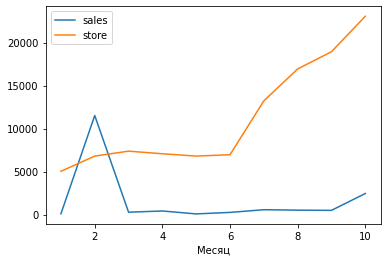

In [113]:
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
mnn = "МНН №806"
# mnn = "МНН №592"
result.query('prod_norm_name == @mnn and name == "Алтайский край" and prod_form_norm_name == "КАПЛИ НАЗАЛЬНЫЕ"').groupby('month_').sum()['Count_3'].plot(ax=ax, label='sales');
df.query('МНН == @mnn and Субъект == "Алтайский край" and Ковид == 1 and prod_form_norm_name == "КАПЛИ НАЗАЛЬНЫЕ"').groupby('Месяц').sum()['Количество'].plot(ax=ax, label='store');
plt.legend()

In [ ]:
groupby(id)
Counts
id 1 2 3 4 5 6 7 8 9 10 s

In [116]:
df.columns

Index(['Месяц', 'МНН', 'prod_form_norm_name',
       'Нормализованное наименование дозировки ЛП',
       'Количество первичной в потребительской упаковке',
       'Масса/объем в первичной упаковке', 'ЖНЛП', 'Ковид', 'Происхождение',
       'Код субъекта', 'Субъект', 'Количество'],
      dtype='object')

In [117]:
result.columns

Index(['year_', 'month_', 'prod_norm_name', 'prod_form_norm_name',
       'prod_d_norm_name', 'prod_pack_1_2', 'prod_pack_1_size', 'ЖНВЛП',
       'Ковид', 'origin', 'code', 'name', 'max_3', 'min_3', 'avg_3',
       'Count_3'],
      dtype='object')

In [ ]:
df.rename(columns={
        'Месяц', 'МНН', 'prod_form_norm_name',
       'Нормализованное наименование дозировки ЛП',
       'Количество первичной в потребительской упаковке',
       'Масса/объем в первичной упаковке', 'ЖНЛП', 'Ковид', 'Происхождение',
       'Код субъекта', 'Субъект', 'Количество'
    
})

In [118]:
df.head()

,Месяц,МНН,prod_form_norm_name,Нормализованное наименование дозировки ЛП,Количество первичной в потребительской упаковке,Масса/объем в первичной упаковке,ЖНЛП,Ковид,Происхождение,Код субъекта,Субъект,Количество
3929897,1,МНН №592,СУППОЗИТОРИИ РЕКТАЛЬНЫЕ,15 мг,2,5.0,0,0,Отечественное,22,Алтайский край,497
3929904,1,МНН №682,НАСТОЙКА,НЕ УКАЗАНО,1,25.0,0,0,Отечественное,22,Алтайский край,1043
3929916,1,МНН №187,ТАБЛЕТКИ,500 мг,1,10.0,0,0,Отечественное,22,Алтайский край,38021
3929946,1,МНН №316,КАПЛИ ДЛЯ ПРИЕМА ВНУТРЬ,15000 МЕ/мл,1,20.0,1,0,Отечественное,22,Алтайский край,988
3929976,1,МНН №746,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,100 мг,3,10.0,1,0,Отечественное,22,Алтайский край,260


In [121]:
# розничная реализация с объемами и макс и мин ценами, происхождение
# таких же объемах - остатки складские, сколько этих лекарств было на начало месяца, Count
# макс минимальная средняя цена одной единицы данного лекарственного
# кол-во единиц было продано в рознице
# цена в копейках
# дотированное лекарстов дотированное из бюджета
# возмездные продажи
# 1 - российское
# 2 - иностранное
# есть такого МНН нет только отечественного, то не заполняли
# если null нет такой характеристики
# 10 месяцев тк недавно началась работать за 10 мес этого года
# ковидный список, посмотреть исходя из тренда - посмотреть обеспеченность тем или иными 
# минздрав какой МНН как уходят лекарства
# сколько МНН такого нужно на лечение такого кол-ва жителей расчеты движется тренд что будет в январе 
# сл года с обеспеченностью лекарствами, соседние регионы, наложение с гриппом
# чтобы не было таких историй
# ЦРПТ в интересах Минпромторга и Минздрава
# Минпромторг маркировка лекарств ГИС МРП, насколько маркировка помогает решению любым процессов
# МНН международное патентованное наименование
# сколько МНН / кол-во пользователей, сколько тратится лекарства на всех
# из МНН #33 будет плохо в Адыгеи
# цена будет не совсем коррелировать

In [127]:
(result.query('prod_norm_name == "МНН №89"')['max_3'].mean(), result.query('prod_norm_name == "МНН №89"')['max_3'].min())

(15749.114592933947, 1.0)

In [119]:
result.head()

,year_,month_,prod_norm_name,prod_form_norm_name,prod_d_norm_name,prod_pack_1_2,prod_pack_1_size,ЖНВЛП,Ковид,origin,code,name,max_3,min_3,avg_3,Count_3
0,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,2.0,Республика Башкортостан,31650.0,31650.0,31650.0,3.0
1,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,14.0,Республика Саха (Якутия),NaN,NaN,NaN,NaN
2,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,15.0,Республика Северная Осетия - Алания,NaN,NaN,NaN,NaN
3,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,18.0,Удмуртская Республика,NaN,NaN,NaN,NaN
4,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,20.0,Чеченская Республика,NaN,NaN,NaN,NaN


In [131]:
result.describe()

,month_,prod_pack_1_size,origin,code,max_3,min_3,avg_3,Count_3
count,1.412183e+07,1.412183e+07,1.412183e+07,1.412183e+07,1.965257e+06,1.965257e+06,1.965257e+06,1.965257e+06
mean,5.500055e+00,5.315636e+03,1.344470e+00,4.338829e+01,7.293310e+04,5.372466e+04,6.151468e+04,2.854663e+03
std,2.872307e+00,2.755634e+05,4.751952e-01,2.520113e+01,1.672269e+06,1.670914e+06,1.671319e+06,4.841025e+04
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.000000e+00,7.000000e+00,1.000000e+00,2.200000e+01,1.600000e+04,9.281000e+03,1.241800e+04,1.000000e+01
50%,6.000000e+00,1.000000e+01,1.000000e+00,4.300000e+01,3.650000e+04,2.240950e+04,2.888000e+04,4.800000e+01
75%,8.000000e+00,3.000000e+01,2.000000e+00,6.400000e+01,7.168800e+04,4.795000e+04,5.771000e+04,2.920000e+02
max,1.000000e+01,3.360000e+07,2.000000e+00,9.200000e+01,5.652560e+08,5.652560e+08,5.652560e+08,1.904270e+07


In [ ]:
result.query('МНН == "МНН №806" and Субъект == "Алтайский край" and Ковид == 1')

In [77]:
df.query('МНН == "МНН №592" and Субъект == "Алтайский край"').groupby('Месяц').sum()['Количество']

Месяц
1      497
2     1003
3     1522
4     2006
5     2265
6     2514
7     2648
8     2693
9     2853
10    2777
Name: Количество, dtype: int64

In [ ]:
df

In [49]:
print(sorted(df.query('ЖНЛП == 1')['МНН'].unique()), file=open('spb/data_2/mnn_unique.txt', 'w'))

In [50]:
! cat spb/data_2/mnn_unique.txt

['МНН №10', 'МНН №1000', 'МНН №1001', 'МНН №1002', 'МНН №102', 'МНН №1021', 'МНН №103', 'МНН №1034', 'МНН №1035', 'МНН №1036', 'МНН №1038', 'МНН №1039', 'МНН №1041', 'МНН №1043', 'МНН №1044', 'МНН №1045', 'МНН №1046', 'МНН №1047', 'МНН №1048', 'МНН №1049', 'МНН №105', 'МНН №1050', 'МНН №1051', 'МНН №1053', 'МНН №106', 'МНН №1063', 'МНН №1065', 'МНН №1066', 'МНН №1067', 'МНН №1071', 'МНН №1072', 'МНН №1074', 'МНН №1080', 'МНН №1081', 'МНН №1083', 'МНН №1084', 'МНН №1086', 'МНН №1087', 'МНН №1088', 'МНН №109', 'МНН №1090', 'МНН №1093', 'МНН №1094', 'МНН №1095', 'МНН №1096', 'МНН №1097', 'МНН №1099', 'МНН №11', 'МНН №1100', 'МНН №1101', 'МНН №1103', 'МНН №1104', 'МНН №1105', 'МНН №1106', 'МНН №1107', 'МНН №1108', 'МНН №1109', 'МНН №1110', 'МНН №1111', 'МНН №1112', 'МНН №1119', 'МНН №1121', 'МНН №1124', 'МНН №1125', 'МНН №1127', 'МНН №113', 'МНН №1130', 'МНН №1132', 'МНН №1134', 'МНН №1137', 'МНН №1138', 'МНН №1140', 'МНН №1144', 'МНН №1156', 'МНН №1157', 'МНН №116', 'МНН №1160', 'МНН №116

In [19]:
df.columns

Index(['Месяц', 'МНН', 'Нормализованное наименование формы выпуска ЛП',
       'Нормализованное наименование дозировки ЛП',
       'Количество первичной в потребительской упаковке',
       'Масса/объем в первичной упаковке', 'ЖНЛП', 'Ковид', 'Происхождение',
       'Код субъекта', 'Субъект', 'Количество',
       'Масса/объем в первичной уп-ке', 'Код субъекта РФ',
       'Наименование субъекта РФ', 'Количество хранимой продукции (шт)'],
      dtype='object')

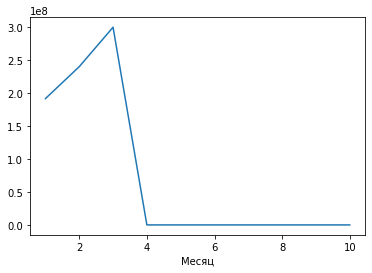

In [26]:
%matplotlib inline
df.sort_values('Месяц').groupby('Месяц').sum()['Количество хранимой продукции (шт)'].plot();

In [10]:
! pip install openpyxl

    100% |████████████████████████████████| 245kB 10.0MB/s ta 0:00:01
You are using pip version 19.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [15]:
! pip install xlrd

    100% |████████████████████████████████| 102kB 2.8MB/s a 0:00:011
You are using pip version 19.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [59]:
sales.columns

Index(['year_', 'month_', 'prod_norm_name', 'prod_form_norm_name',
       'prod_d_norm_name', 'prod_pack_1_2', 'prod_pack_1_size', 'ЖНВЛП',
       'Ковид', 'origin', 'code', 'max_3', 'min_3', 'avg_3', 'Count_3',
       'is_sales', 'name'],
      dtype='object')

In [82]:
sales_reg = sales.groupby(['month_', 'name'], as_index=False).sum()
store_reg = store.groupby(['month_', 'name'], as_index=False).sum()
store_reg = store_reg[['month_', 'name', 'Count_3']]
store_reg.rename({'Count_3': 'Count_3_store'}, axis=1, inplace=True)

common = pd.merge(store_reg, sales_reg, on=['month_', 'name'], how='inner')
common = pd.merge(common, covid, left_on='name', right_on='name_store', how='left')
common

,month__x,name,Count_3_store,year_,prod_pack_1_size,ЖНВЛП,Ковид,origin,code,max_3,...,is_sales,name_store,month__y,Unnamed: 0,Выздоровлений,Заражений за день,Выздоровлений за день,Смертей за день,Смертей,"Летальность, %"
0,1,Алтайский край,2972571,33574873,8.831353e+07,9389,387,22336.0,365486.0,34845497.0,...,16613,Алтайский край,1.0,575222.0,1025215.0,6092.0,4507.0,309.0,32043.0,88.53
1,1,Алтайский край,2972571,33574873,8.831353e+07,9389,387,22336.0,365486.0,34845497.0,...,16613,Алтайский край,2.0,523607.0,1038982.0,4529.0,3782.0,316.0,38052.0,91.63
2,1,Алтайский край,2972571,33574873,8.831353e+07,9389,387,22336.0,365486.0,34845497.0,...,16613,Алтайский край,3.0,579726.0,1261244.0,3604.0,3313.0,330.0,51433.0,113.02
3,1,Алтайский край,2972571,33574873,8.831353e+07,9389,387,22336.0,365486.0,34845497.0,...,16613,Алтайский край,4.0,556532.0,1303729.0,2526.0,2335.0,231.0,58890.0,121.43
4,1,Алтайский край,2972571,33574873,8.831353e+07,9389,387,22336.0,365486.0,34845497.0,...,16613,Алтайский край,5.0,574766.0,1415186.0,1977.0,2019.0,238.0,67550.0,133.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8545,10,Ярославская область,4139548,33578915,8.831355e+07,9391,387,22338.0,1262740.0,360289884.0,...,16615,Ярославская область,7.0,706758.0,1309075.0,5900.0,2669.0,145.0,24189.0,51.70
8546,10,Ярославская область,4139548,33578915,8.831355e+07,9391,387,22338.0,1262740.0,360289884.0,...,16615,Ярославская область,8.0,711089.0,1410056.0,6048.0,4105.0,168.0,28933.0,54.68
8547,10,Ярославская область,4139548,33578915,8.831355e+07,9391,387,22338.0,1262740.0,360289884.0,...,16615,Ярославская область,9.0,693196.0,1529017.0,5728.0,6006.0,184.0,33415.0,56.88
8548,10,Ярославская область,4139548,33578915,8.831355e+07,9391,387,22338.0,1262740.0,360289884.0,...,16615,Ярославская область,10.0,707081.0,1752307.0,7457.0,4983.0,175.0,40073.0,61.51


In [52]:
sales_reg

,month_,name_store,year_,prod_pack_1_size,ЖНВЛП,Ковид,origin,code,max_3,min_3,avg_3,Count_3,is_sales
0,1.0,Алтайский край,33574873,8.831353e+07,9389,387,22336.0,365486.0,34845497.0,31654821.0,33330153.0,64758.0,16613
1,1.0,Амурская область,33574873,8.831353e+07,9389,387,22336.0,465164.0,34158922.0,30814137.0,32558000.0,183810.0,16613
2,1.0,Архангельская область,33574873,8.831353e+07,9389,387,22336.0,481777.0,7745318.0,7436956.5,7639713.0,46557.0,16613
3,1.0,Астраханская область,33574873,8.831353e+07,9389,387,22336.0,498390.0,36157194.0,33319803.0,34732630.0,57314.0,16613
4,1.0,Белгородская область,33578915,8.831354e+07,9391,387,22338.0,515065.0,161489131.0,108555073.0,137153498.0,161589.0,16615
...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,10.0,Чеченская республика,33574873,8.831353e+07,9389,387,22336.0,332260.0,41470127.0,40789029.0,41112542.0,5418.0,16613
846,10.0,Чувашская республика,33578915,8.831355e+07,9391,387,22338.0,348915.0,221698269.0,178445417.0,199287794.0,471565.0,16615
847,10.0,Чукотский автономный округ,33574873,8.831353e+07,9389,387,22336.0,1445331.0,150000.0,150000.0,150000.0,1.0,16613
848,10.0,Ямало-Ненецкий автономный округ,33574873,8.831353e+07,9389,387,22336.0,1478557.0,75177435.0,64207245.0,70085035.0,81395.0,16613


,month_,name,Count_3_store,year_,prod_pack_1_size,ЖНВЛП,Ковид,origin,code,max_3,min_3,avg_3,Count_3,is_sales
0,1,Алтайский край,2972571,33574873,8.831353e+07,9389,387,22336.0,365486.0,34845497.0,31654821.0,33330153.0,64758.0,16613
1,1,Амурская область,1194623,33574873,8.831353e+07,9389,387,22336.0,465164.0,34158922.0,30814137.0,32558000.0,183810.0,16613
2,1,Архангельская область,889466,33574873,8.831353e+07,9389,387,22336.0,481777.0,7745318.0,7436956.5,7639713.0,46557.0,16613
3,1,Астраханская область,1105070,33574873,8.831353e+07,9389,387,22336.0,498390.0,36157194.0,33319803.0,34732630.0,57314.0,16613
4,1,Белгородская область,2235551,33578915,8.831354e+07,9391,387,22338.0,515065.0,161489131.0,108555073.0,137153498.0,161589.0,16615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,10,Ханты-Мансийский автономный округ - Югра,6576488,33578915,8.831355e+07,9391,387,22338.0,1428890.0,187368442.0,156331299.0,173415892.0,211310.0,16615
766,10,Челябинская область,8733581,33582957,8.831356e+07,9393,387,22340.0,1229658.0,255713854.0,197105699.5,225061033.0,1947802.0,16617
767,10,Чукотский автономный округ,221909,33574873,8.831353e+07,9389,387,22336.0,1445331.0,150000.0,150000.0,150000.0,1.0,16613
768,10,Ямало-Ненецкий автономный округ,1601393,33574873,8.831353e+07,9389,387,22336.0,1478557.0,75177435.0,64207245.0,70085035.0,81395.0,16613


In [10]:
len(set(common['name']) & set(covid['name_store']))

NameError: name 'covid' is not defined

In [14]:
common['name']

0                            Алтайский край
1                            Алтайский край
2                            Алтайский край
3                            Алтайский край
4                            Алтайский край
                       ...                 
8445    Республика Северная Осетия - Алания
8446       Республика Татарстан (Татарстан)
8447                  Удмуртская Республика
8448                   Чеченская Республика
8449         Чувашская Республика - Чувашия
Name: name, Length: 8450, dtype: object

,month__x,name,Count_3_store,year_,prod_pack_1_size,ЖНВЛП,Ковид,origin,code,max_3,...,is_sales,name_store,month__y,Unnamed: 0,Выздоровлений,Заражений за день,Выздоровлений за день,Смертей за день,Смертей,"Летальность, %"
0,1,Алтайский край,2972571,33574873,8.831353e+07,9389,387,22336.0,365486.0,34845497.0,...,16613,Алтайский край,1.0,537340.0,1025215.0,6092.0,4507.0,309.0,32043.0,88.53
1,1,Алтайский край,2972571,33574873,8.831353e+07,9389,387,22336.0,365486.0,34845497.0,...,16613,Алтайский край,2.0,489391.0,1038982.0,4529.0,3782.0,316.0,38052.0,91.63
2,1,Алтайский край,2972571,33574873,8.831353e+07,9389,387,22336.0,365486.0,34845497.0,...,16613,Алтайский край,3.0,541844.0,1261244.0,3604.0,3313.0,330.0,51433.0,113.02
3,1,Алтайский край,2972571,33574873,8.831353e+07,9389,387,22336.0,365486.0,34845497.0,...,16613,Алтайский край,4.0,519872.0,1303729.0,2526.0,2335.0,231.0,58890.0,121.43
4,1,Алтайский край,2972571,33574873,8.831353e+07,9389,387,22336.0,365486.0,34845497.0,...,16613,Алтайский край,5.0,536884.0,1415186.0,1977.0,2019.0,238.0,67550.0,133.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8265,10,Ярославская область,4139548,33578915,8.831355e+07,9391,387,22338.0,1262740.0,360289884.0,...,16615,Ярославская область,7.0,649935.0,1309075.0,5900.0,2669.0,145.0,24189.0,51.70
8266,10,Ярославская область,4139548,33578915,8.831355e+07,9391,387,22338.0,1262740.0,360289884.0,...,16615,Ярославская область,8.0,654266.0,1410056.0,6048.0,4105.0,168.0,28933.0,54.68
8267,10,Ярославская область,4139548,33578915,8.831355e+07,9391,387,22338.0,1262740.0,360289884.0,...,16615,Ярославская область,9.0,638206.0,1529017.0,5728.0,6006.0,184.0,33415.0,56.88
8268,10,Ярославская область,4139548,33578915,8.831355e+07,9391,387,22338.0,1262740.0,360289884.0,...,16615,Ярославская область,10.0,650258.0,1752307.0,7457.0,4983.0,175.0,40073.0,61.51


In [15]:
common['month__x'].nunique()

10

In [25]:
len(set(sales['name']) & set(store['name'])), len(set(sales['name'])), len(set(store['name']))

(77, 85, 87)

In [47]:
sales['name'].unique()

array(['Республика Башкортостан', 'Республика Саха (Якутия)',
       'Республика Северная Осетия - Алания', 'Удмуртская Республика',
       'Чеченская Республика', 'Брянская область',
       'Ленинградская область', 'Новосибирская область', 'Омская область',
       'Пензенская область', 'Ульяновская область', 'Республика Крым',
       'Красноярский край', 'Приморский край', 'Амурская область',
       'Калужская область', 'Кемеровская область', 'Ростовская область',
       'Челябинская область', 'Забайкальский край', 'Санкт-Петербург',
       'Республика Коми', 'Краснодарский край', 'Астраханская область',
       'Самарская область', 'Томская область',
       'Ненецкий автономный округ', 'Республика Дагестан',
       'Республика Татарстан (Татарстан)', 'Республика Тыва',
       'Республика Хакасия', 'Чувашская Республика - Чувашия',
       'Волгоградская область', 'Вологодская область',
       'Магаданская область', 'Мурманская область', 'Саратовская область',
       'Тамбовская область

In [83]:
common.to_csv('spb/common_per_region.csv', index=False)

In [85]:
store['Count_3'].describe()

count    4.217737e+06
mean     9.384878e+02
std      6.244794e+03
min      1.000000e+00
25%      2.000000e+01
50%      1.110000e+02
75%      4.990000e+02
max      1.636185e+06
Name: Count_3, dtype: float64

In [99]:
prod_names_tmp = set(sales.query('Count_3 > 0')['prod_norm_name']) - set(store['prod_norm_name'])

In [105]:
sales.query('prod_norm_name in @prod_names_tmp').query('Count_3 > 10000 and Ковид == 0')

,year_,month_,prod_norm_name,prod_form_norm_name,prod_d_norm_name,prod_pack_1_2,prod_pack_1_size,ЖНВЛП,Ковид,origin,code,name,max_3,min_3,avg_3,Count_3,is_sales
48488,2021,1.0,МНН №530,ТАБЛЕТКИ ДЛЯ РАССАСЫВАНИЯ,НЕ УКАЗАНО,2,12.0,0,0,2.0,64.0,Саратовская область,33200.0,11481.5,22963.0,10010.0,True
48591,2021,1.0,МНН №1980,ТАБЛЕТКИ ДЛЯ РАССАСЫВАНИЯ,НЕ УКАЗАНО,2,12.0,0,0,2.0,78.0,Санкт-Петербург,35100.0,12614.5,25229.0,116216.0,True
48593,2021,1.0,МНН №530,ТАБЛЕТКИ ДЛЯ РАССАСЫВАНИЯ,НЕ УКАЗАНО,2,12.0,0,0,2.0,24.0,Красноярский край,34500.0,9732.5,19465.0,15554.0,True
48824,2021,1.0,МНН №1980,ТАБЛЕТКИ ДЛЯ РАССАСЫВАНИЯ,НЕ УКАЗАНО,2,12.0,0,0,2.0,50.0,Московская область,37900.0,11515.5,23031.0,14970.0,True
48828,2021,1.0,МНН №1980,ТАБЛЕТКИ ДЛЯ РАССАСЫВАНИЯ,НЕ УКАЗАНО,2,12.0,0,0,2.0,77.0,Москва,37900.0,11870.0,23740.0,46812.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13986125,2021,9.0,МНН №549,ЛИНИМЕНТ,10 %,1,25.0,0,0,1.0,77.0,Москва,9800.0,3260.0,4912.0,23228.0,True
14056849,2021,9.0,МНН №623,ТРАВА ПОРОШОК,НЕ УКАЗАНО,20,1.5,0,0,1.0,77.0,Москва,12700.0,5022.0,8697.0,20550.0,True
14112932,2021,9.0,МНН №417,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,НЕ УКАЗАНО,1.0,21.0,0,0,2.0,50.0,Московская область,168000.0,95400.0,119456.0,14959.0,True
14113073,2021,9.0,МНН №417,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,НЕ УКАЗАНО,1.0,21.0,0,0,2.0,77.0,Москва,168000.0,96525.0,120207.0,51879.0,True


In [107]:
sales.head()

,year_,month_,prod_norm_name,prod_form_norm_name,prod_d_norm_name,prod_pack_1_2,prod_pack_1_size,ЖНВЛП,Ковид,origin,code,name,max_3,min_3,avg_3,Count_3,is_sales
0,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,0,0,2.0,2.0,Республика Башкортостан,31650.0,31650.0,31650.0,3.0,True
1,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,0,0,2.0,14.0,Республика Саха (Якутия),NaN,NaN,NaN,NaN,True
2,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,0,0,2.0,15.0,Республика Северная Осетия — Алания,NaN,NaN,NaN,NaN,True
3,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,0,0,2.0,18.0,Удмуртская республика,NaN,NaN,NaN,NaN,True
4,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,0,0,2.0,20.0,Чеченская республика,NaN,NaN,NaN,NaN,True


In [94]:
sales.query('prod_norm_name == "МНН №1003"')

,year_,month_,prod_norm_name,prod_form_norm_name,prod_d_norm_name,prod_pack_1_2,prod_pack_1_size,ЖНВЛП,Ковид,origin,code,name,max_3,min_3,avg_3,Count_3,is_sales
660506,2021,1.0,МНН №1003,ТАБЛЕТКИ,НЕ УКАЗАНО,1,12.0,0,0,2.0,11.0,Республика Коми,NaN,NaN,NaN,NaN,True
660507,2021,1.0,МНН №1003,ТАБЛЕТКИ,НЕ УКАЗАНО,1,12.0,0,0,2.0,30.0,Астраханская область,NaN,NaN,NaN,NaN,True
660508,2021,1.0,МНН №1003,ТАБЛЕТКИ,НЕ УКАЗАНО,1,12.0,0,0,2.0,49.0,Магаданская область,NaN,NaN,NaN,NaN,True
660509,2021,1.0,МНН №1003,ТАБЛЕТКИ,НЕ УКАЗАНО,1,12.0,0,0,2.0,51.0,Мурманская область,NaN,NaN,NaN,NaN,True
660510,2021,1.0,МНН №1003,ТАБЛЕТКИ,НЕ УКАЗАНО,1,12.0,0,0,2.0,60.0,Псковская область,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13372611,2021,9.0,МНН №1003,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,НЕ УКАЗАНО,1,12.0,0,0,2.0,42.0,Кемеровская область,NaN,NaN,NaN,NaN,True
13372612,2021,9.0,МНН №1003,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,НЕ УКАЗАНО,1,12.0,0,0,2.0,63.0,Самарская область,NaN,NaN,NaN,NaN,True
13372613,2021,9.0,МНН №1003,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,НЕ УКАЗАНО,1,12.0,0,0,2.0,70.0,Томская область,NaN,NaN,NaN,NaN,True
13372614,2021,9.0,МНН №1003,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,НЕ УКАЗАНО,1,12.0,0,0,2.0,72.0,Тюменская область,NaN,NaN,NaN,NaN,True


In [88]:
len(set(sales['prod_norm_name']) - set(store['prod_norm_name']))

515

In [86]:
sales.head()

,year_,month_,prod_norm_name,prod_form_norm_name,prod_d_norm_name,prod_pack_1_2,prod_pack_1_size,ЖНВЛП,Ковид,origin,code,name,max_3,min_3,avg_3,Count_3,is_sales
0,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,0,0,2.0,2.0,Республика Башкортостан,31650.0,31650.0,31650.0,3.0,True
1,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,0,0,2.0,14.0,Республика Саха (Якутия),NaN,NaN,NaN,NaN,True
2,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,0,0,2.0,15.0,Республика Северная Осетия — Алания,NaN,NaN,NaN,NaN,True
3,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,0,0,2.0,18.0,Удмуртская республика,NaN,NaN,NaN,NaN,True
4,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,0,0,2.0,20.0,Чеченская республика,NaN,NaN,NaN,NaN,True


In [110]:
%%time
common.corr()

CPU times: user 12.1 ms, sys: 7 µs, total: 12.1 ms
Wall time: 11.1 ms


,month__x,Count_3_store,year_,prod_pack_1_size,ЖНВЛП,Ковид,origin,code,max_3,min_3,...,Count_3,is_sales,month__y,Unnamed: 0,Выздоровлений,Заражений за день,Выздоровлений за день,Смертей за день,Смертей,"Летальность, %"
month__x,1.000000e+00,2.405829e-01,2.566675e-01,3.438921e-01,2.566675e-01,NaN,2.566675e-01,3.899675e-05,2.153888e-01,1.830460e-01,...,5.607161e-02,2.566675e-01,-1.660097e-15,-2.384834e-15,-1.003540e-16,7.809149e-16,-7.616531e-16,-4.030936e-16,-4.771321e-16,-2.056516e-15
Count_3_store,2.405829e-01,1.000000e+00,4.317807e-01,4.540369e-01,4.317807e-01,NaN,4.317807e-01,1.144034e-01,5.171187e-01,5.123695e-01,...,4.241322e-01,4.317807e-01,-3.787286e-16,2.051755e-01,5.396696e-01,5.641390e-01,5.490783e-01,6.058237e-01,6.022802e-01,2.912412e-01
year_,2.566675e-01,4.317807e-01,1.000000e+00,9.779595e-01,1.000000e+00,NaN,1.000000e+00,1.411977e-03,5.382073e-01,4.584845e-01,...,1.922828e-01,1.000000e+00,-2.498517e-14,2.026043e-02,2.326542e-01,2.335109e-01,2.276136e-01,2.505792e-01,2.452604e-01,7.351345e-02
prod_pack_1_size,3.438921e-01,4.540369e-01,9.779595e-01,1.000000e+00,9.779595e-01,NaN,9.779595e-01,-1.114993e-03,5.466975e-01,4.649410e-01,...,1.911926e-01,9.779595e-01,-1.261118e-11,2.428767e-02,2.363754e-01,2.363147e-01,2.309508e-01,2.499331e-01,2.495665e-01,6.938568e-02
ЖНВЛП,2.566675e-01,4.317807e-01,1.000000e+00,9.779595e-01,1.000000e+00,NaN,1.000000e+00,1.411977e-03,5.382073e-01,4.584845e-01,...,1.922828e-01,1.000000e+00,2.051260e-14,2.026043e-02,2.326542e-01,2.335109e-01,2.276136e-01,2.505792e-01,2.452604e-01,7.351345e-02
Ковид,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
origin,2.566675e-01,4.317807e-01,1.000000e+00,9.779595e-01,1.000000e+00,NaN,1.000000e+00,1.411977e-03,5.382073e-01,4.584845e-01,...,1.922828e-01,1.000000e+00,-1.428449e-14,2.026043e-02,2.326542e-01,2.335109e-01,2.276136e-01,2.505792e-01,2.452604e-01,7.351345e-02
code,3.899675e-05,1.144034e-01,1.411977e-03,-1.114993e-03,1.411977e-03,NaN,1.411977e-03,1.000000e+00,3.036089e-02,4.407548e-02,...,9.307370e-02,1.411977e-03,-8.910323e-17,-1.560408e-01,1.822523e-01,1.772901e-01,1.789166e-01,1.842589e-01,1.914016e-01,-7.475533e-04
max_3,2.153888e-01,5.171187e-01,5.382073e-01,5.466975e-01,5.382073e-01,NaN,5.382073e-01,3.036089e-02,1.000000e+00,9.585488e-01,...,2.809653e-01,5.382073e-01,-2.412051e-16,1.485405e-01,3.626636e-01,3.557728e-01,3.490524e-01,3.489374e-01,3.608254e-01,5.364708e-02
min_3,1.830460e-01,5.123695e-01,4.584845e-01,4.649410e-01,4.584845e-01,NaN,4.584845e-01,4.407548e-02,9.585488e-01,1.000000e+00,...,2.454801e-01,4.584845e-01,-2.196908e-16,1.776939e-01,3.542383e-01,3.528773e-01,3.450852e-01,3.677558e-01,3.719963e-01,1.054422e-01


<AxesSubplot:>

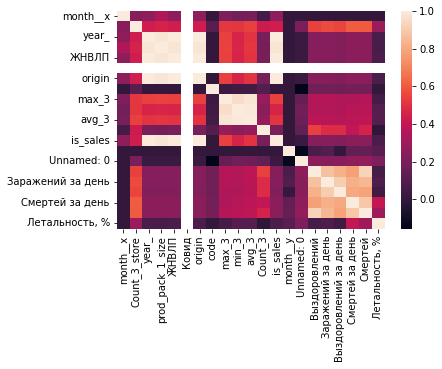

In [113]:
import seaborn as sns

sns.heatmap(common.corr())

In [ ]:
common

In [118]:
common['month__x'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [99]:
covid

,Unnamed: 0,Дата,Выздоровлений,Заражений за день,Выздоровлений за день,Смертей за день,Смертей,"Летальность, %",name_store,name_covid
0,0,20.09.2020,5554,62,92,1,79,1.17,Томская область,Томская обл.
1,1,22.09.2020,5598,61,20,0,79,1.15,Томская область,Томская обл.
2,2,16.09.2020,5314,51,63,0,77,1.18,Томская область,Томская обл.
3,3,18.09.2020,5411,62,72,1,78,1.17,Томская область,Томская обл.
4,4,27.09.2021,36406,85,53,0,563,1.30,Томская область,Томская обл.
...,...,...,...,...,...,...,...,...,...,...
45810,45810,28.03.2021,27757,43,68,5,334,1.11,Калининградская область,Калининградская обл.
45811,45811,05.05.2021,30467,41,79,6,425,1.32,Калининградская область,Калининградская обл.
45812,45812,15.01.2021,18978,209,202,6,210,1.01,Калининградская область,Калининградская обл.
45813,45813,19.06.2021,33678,90,76,0,519,1.49,Калининградская область,Калининградская обл.


In [75]:
sorted(set(store['name']))

['Алтайский край',
 'Амурская область',
 'Архангельская область',
 'Астраханская область',
 'Байконур',
 'Белгородская область',
 'Брянская область',
 'Владимирская область',
 'Волгоградская область',
 'Вологодская область',
 'Воронежская область',
 'Еврейская автономная область',
 'Забайкальский край',
 'Ивановская область',
 'Иркутская область',
 'Кабардино-Балкарская республика',
 'Калининградская область',
 'Калужская область',
 'Камчатский край',
 'Карачаево-Черкесская республика',
 'Кемеровская область',
 'Кировская область',
 'Костромская область',
 'Краснодарский край',
 'Красноярский край',
 'Курганская область',
 'Курская область',
 'Ленинградская область',
 'Липецкая область',
 'Магаданская область',
 'Москва',
 'Московская область',
 'Мурманская область',
 'Ненецкий автономный округ',
 'Нижегородская область',
 'Новгородская область',
 'Новосибирская область',
 'Омская область',
 'Оренбургская область',
 'Орловская область',
 'Пензенская область',
 'Пермский край',
 'Примор

In [81]:
covid = pd.read_csv('spb/covid_full_stat_v2.csv', parse_dates=True, index_col='Дата', dayfirst=True)
covid = covid['2021']
covid['month_'] = covid.index.month
covid = covid.groupby(['name_store', 'month_'], as_index=False).sum()
covid

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


,name_store,month_,Unnamed: 0,Выздоровлений,Заражений за день,Выздоровлений за день,Смертей за день,Смертей,"Летальность, %"
0,Кабардино-Балкарская республика,1,99701,493086,2950,3519,63,9099,52.31
1,Кабардино-Балкарская республика,2,98195,521969,2214,2137,42,9854,49.36
2,Кабардино-Балкарская республика,3,108813,642581,1803,2030,50,12169,55.33
3,Кабардино-Балкарская республика,4,96168,671639,970,1222,32,13018,55.76
4,Кабардино-Балкарская республика,5,99870,722801,565,724,17,14261,59.18
...,...,...,...,...,...,...,...,...,...
930,Ярославская область,7,706758,1309075,5900,2669,145,24189,51.70
931,Ярославская область,8,711089,1410056,6048,4105,168,28933,54.68
932,Ярославская область,9,693196,1529017,5728,6006,184,33415,56.88
933,Ярославская область,10,707081,1752307,7457,4983,175,40073,61.51


In [79]:
set(covid['name_store']) ^ set(sales['name'])

{' Кабардино-Балкарская республика',
 ' Карачаево-Черкесская республика',
 ' Республика Адыгея',
 ' Республика Северная Осетия — Алания',
 ' Республика Татарстан',
 ' Удмуртская республика',
 ' Чеченская республика',
 ' Чувашская республика',
 'Кабардино-Балкарская республика',
 'Карачаево-Черкесская республика',
 'Республика Адыгея',
 'Республика Северная Осетия — Алания',
 'Республика Татарстан',
 'Удмуртская республика',
 'Чеченская республика',
 'Чувашская республика'}

In [25]:
len(set(covid['Регион'])), len(set(sales['name'])), len(set(store['name']))

(85, 85, 87)

In [80]:
set(store['name']) ^ set(sales['name'])

{'Байконур', 'РФ'}

In [29]:
len(set(store['name']) & set(sales['name']))

77

In [32]:
len(set(sales['name']))

85

In [37]:
common_sales_store_name = set(store['name']) & set(sales['name'])

names_all = pd.DataFrame({
              'name_covid': list(sorted(set(covid['Регион']))), 
              'name_sales': list(sorted(set(sales['name']))),
              'name_store': list(sorted(common_sales_store_name)) + [None] * (85 - len(common_sales_store_name))
             })
names_all.to_csv('spb/names_all_sources.csv', index=False)

In [39]:
names_all.head(30)

,name_covid,name_sales,name_store
0,Адыгея,Алтайский край,Алтайский край
1,Алтай,Амурская область,Амурская область
2,Алтайский край,Архангельская область,Архангельская область
3,Амурская обл.,Астраханская область,Астраханская область
4,Архангельская обл.,Белгородская область,Белгородская область
5,Астраханская обл.,Брянская область,Брянская область
6,Башкортостан,Владимирская область,Владимирская область
7,Белгородская обл.,Волгоградская область,Волгоградская область
8,Брянская обл.,Вологодская область,Вологодская область
9,Бурятия,Воронежская область,Воронежская область


In [74]:
covid

,name_store,month_,Unnamed: 0,Выздоровлений,Заражений за день,Выздоровлений за день,Смертей за день,Смертей,"Летальность, %"
0,Алтайский край,1,537340,1025215,6092,4507,309,32043,88.53
1,Алтайский край,2,489391,1038982,4529,3782,316,38052,91.63
2,Алтайский край,3,541844,1261244,3604,3313,330,51433,113.02
3,Алтайский край,4,519872,1303729,2526,2335,231,58890,121.43
4,Алтайский край,5,536884,1415186,1977,2019,238,67550,133.21
...,...,...,...,...,...,...,...,...,...
820,Ярославская область,7,649935,1309075,5900,2669,145,24189,51.70
821,Ярославская область,8,654266,1410056,6048,4105,168,28933,54.68
822,Ярославская область,9,638206,1529017,5728,6006,184,33415,56.88
823,Ярославская область,10,650258,1752307,7457,4983,175,40073,61.51


In [22]:
sorted(set(covid['Регион']))

['Адыгея',
 'Алтай',
 'Алтайский край',
 'Амурская обл.',
 'Архангельская обл.',
 'Астраханская обл.',
 'Башкортостан',
 'Белгородская обл.',
 'Брянская обл.',
 'Бурятия',
 'Владимирская обл.',
 'Волгоградская обл.',
 'Вологодская обл.',
 'Воронежская обл.',
 'Дагестан',
 'Еврейская АО',
 'Забайкальский край',
 'Ивановская обл.',
 'Ингушетия',
 'Иркутская обл.',
 'Кабардино-Балкария',
 'Калининградская обл.',
 'Калмыкия',
 'Калужская обл.',
 'Камчатский край',
 'Карачаево-Черкессия',
 'Карелия',
 'Кемеровская обл.',
 'Кировская обл.',
 'Коми',
 'Костромская обл.',
 'Краснодарский край',
 'Красноярский край',
 'Крым',
 'Курганская обл.',
 'Курская обл.',
 'Ленинградская обл.',
 'Липецкая обл.',
 'Магаданская обл.',
 'Марий Эл',
 'Мордовия',
 'Москва',
 'Московская обл.',
 'Мурманская обл.',
 'Ненецкий АО',
 'Нижегородская обл.',
 'Новгородская обл.',
 'Новосибирская обл.',
 'Омская обл.',
 'Оренбургская обл.',
 'Орловская обл.',
 'Пензенская обл.',
 'Пермский край',
 'Приморский край',


In [57]:
set(sales['name_store'])

{'Алтайский край',
 'Амурская область',
 'Архангельская область',
 'Астраханская область',
 'Белгородская область',
 'Брянская область',
 'Владимирская область',
 'Волгоградская область',
 'Вологодская область',
 'Воронежская область',
 'Еврейская автономная область',
 'Забайкальский край',
 'Ивановская область',
 'Иркутская область',
 'Кабардино-Балкарская республика',
 'Калининградская область',
 'Калужская область',
 'Камчатский край',
 'Карачаево-Черкесская республика',
 'Кемеровская область',
 'Кировская область',
 'Костромская область',
 'Краснодарский край',
 'Красноярский край',
 'Курганская область',
 'Курская область',
 'Ленинградская область',
 'Липецкая область',
 'Магаданская область',
 'Москва',
 'Московская область',
 'Мурманская область',
 'Ненецкий автономный округ',
 'Нижегородская область',
 'Новгородская область',
 'Новосибирская область',
 'Омская область',
 'Оренбургская область',
 'Орловская область',
 'Пензенская область',
 'Пермский край',
 'Приморский край',
 

,Регион,Выздоровлений,Заражений за день,Выздоровлений за день
Дата,,,,
2020-09-20,Томская обл.,5554,62,92
2020-09-26,Костромская обл.,3329,54,44
2021-09-02,Ямало-Ненецкий АО,45810,102,121
2020-12-15,Сахалинская обл.,10292,142,366
2020-09-21,Волгоградская обл.,12376,95,13
...,...,...,...,...
2020-04-24,Камчатский край,5,6,0
2020-10-13,Брянская обл.,8264,86,24
2021-05-06,Амурская обл.,21565,13,17


In [56]:
covid = covid['2021']
covid['month_'] = covid.index.month

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


In [59]:
names_all

,name_covid,name_sales,name_store
0,Адыгея,Алтайский край,Алтайский край
1,Алтай,Амурская область,Амурская область
2,Алтайский край,Архангельская область,Архангельская область
3,Амурская обл.,Астраханская область,Астраханская область
4,Архангельская обл.,Белгородская область,Белгородская область
...,...,...,...
80,Чечня,Чеченская Республика,None
81,Чувашия,Чувашская Республика - Чувашия,None
82,Чукотский АО,Чукотский автономный округ,None
83,Ямало-Ненецкий АО,Ямало-Ненецкий автономный округ,None


In [ ]:
covid_stat

In [64]:
covid

,Регион,Выздоровлений,Заражений за день,Выздоровлений за день,month_
Дата,,,,,
2021-09-02,Ямало-Ненецкий АО,45810,102,121,9
2021-04-13,Кабардино-Балкария,22323,32,43,4
2021-03-11,Хабаровский край,46972,57,68,3
2021-02-28,Тамбовская обл.,24072,119,86,2
2021-01-14,Челябинская обл.,25649,292,371,1
...,...,...,...,...,...
2021-06-20,Калмыкия,20507,27,21,6
2021-03-12,Калужская обл.,28716,93,90,3
2021-05-06,Амурская обл.,21565,13,17,5


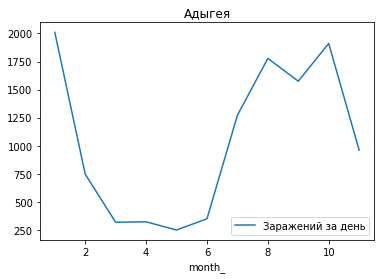

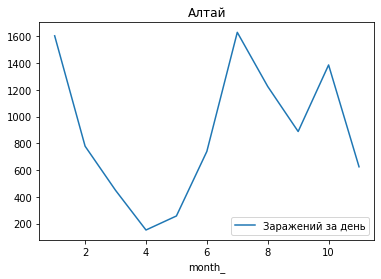

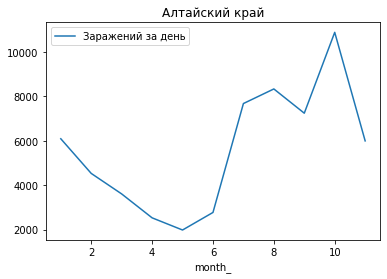

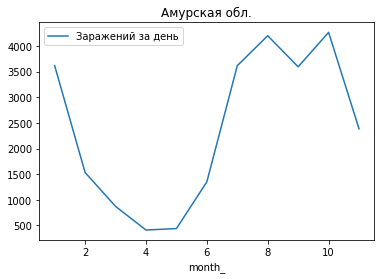

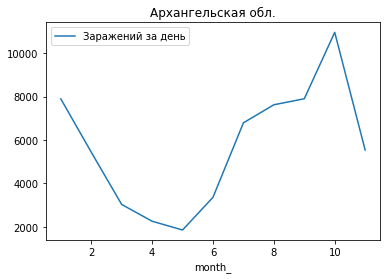

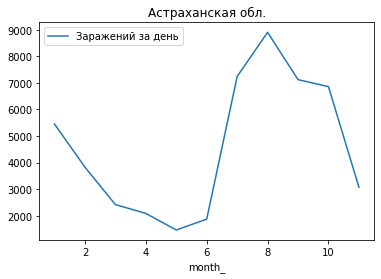

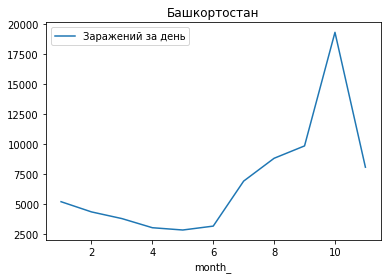

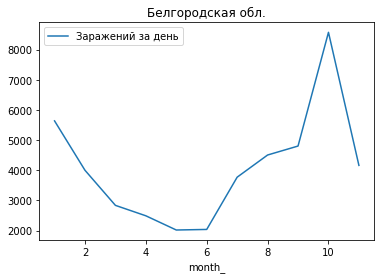

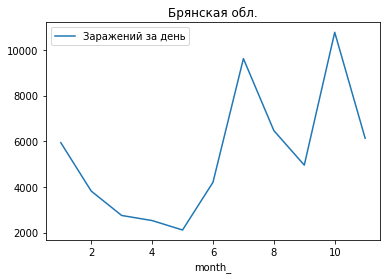

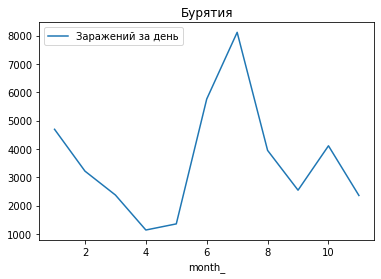

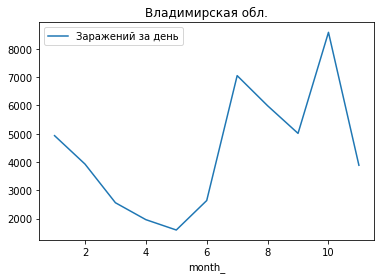

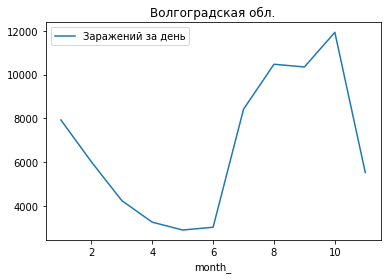

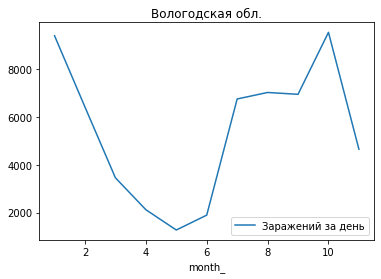

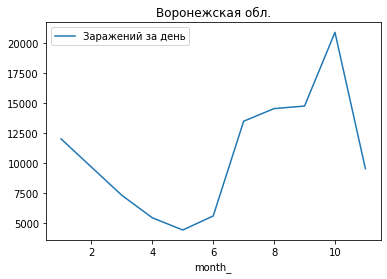

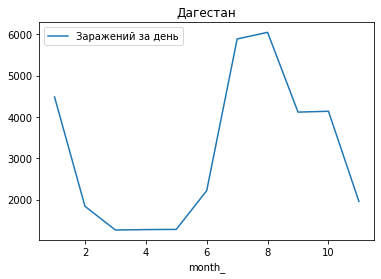

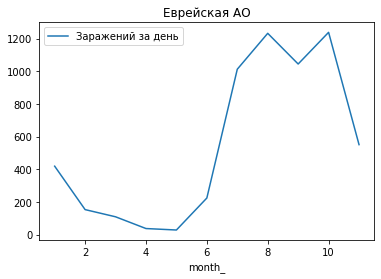

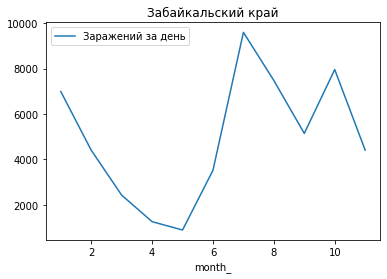

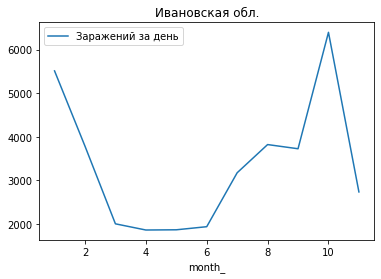

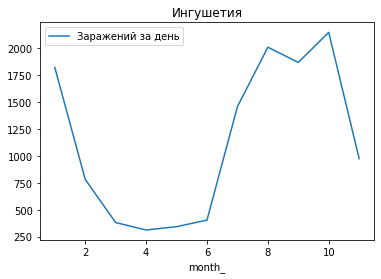

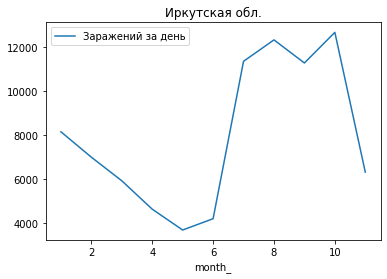

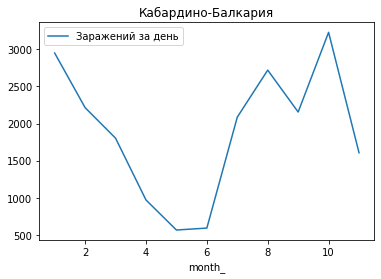

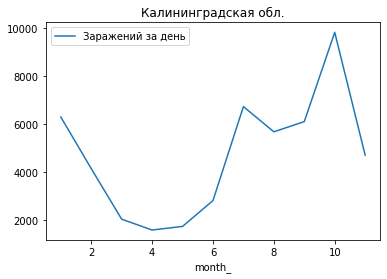

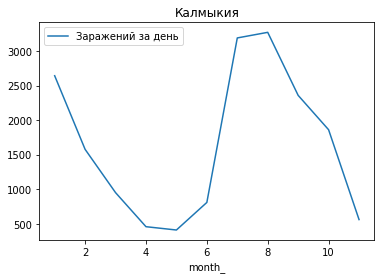

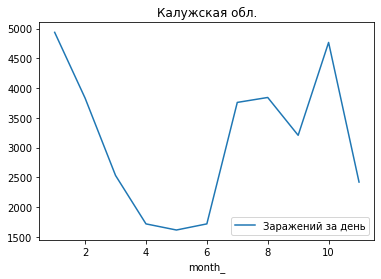

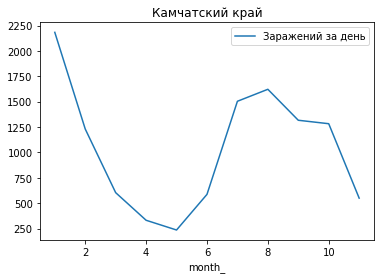

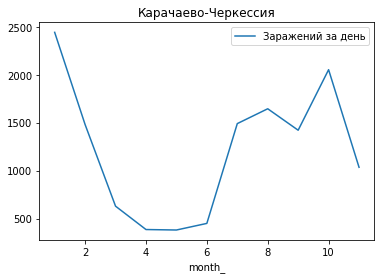

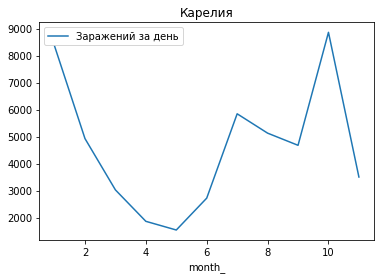

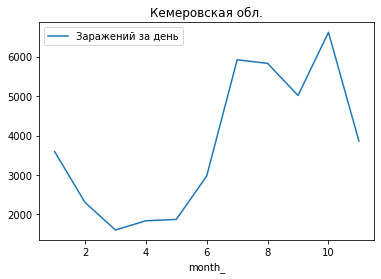

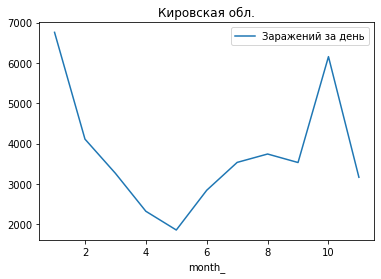

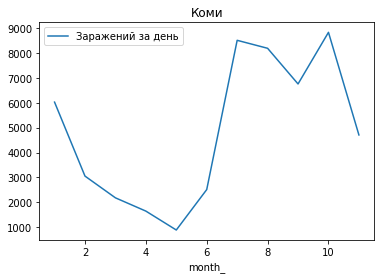

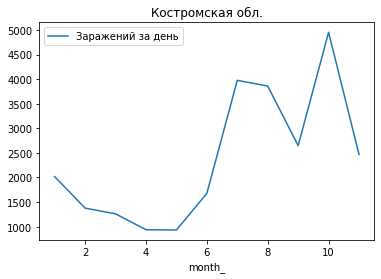

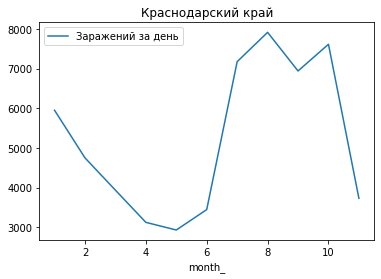

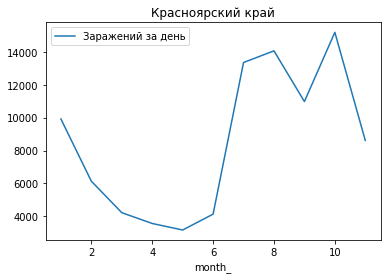

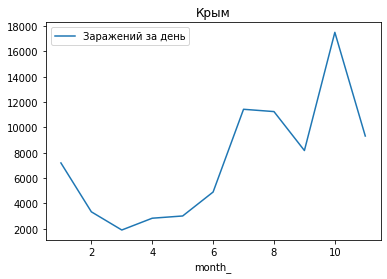

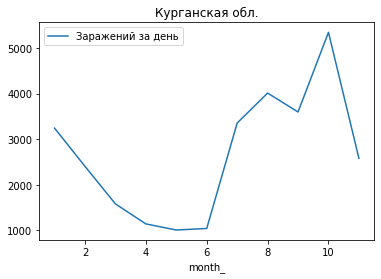

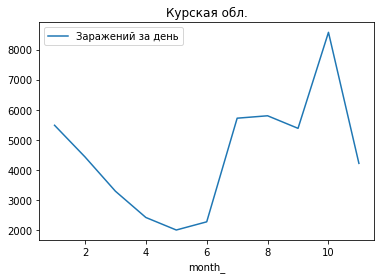

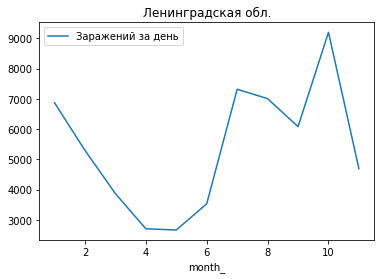

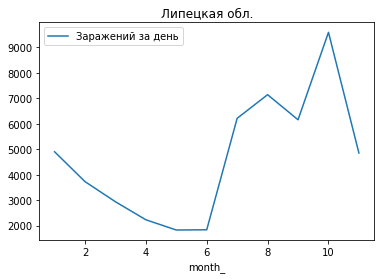

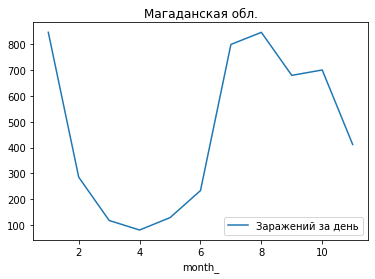

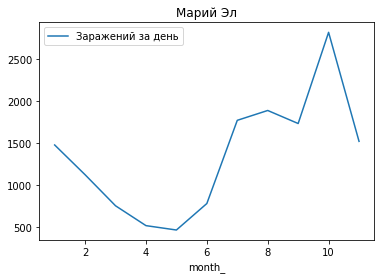

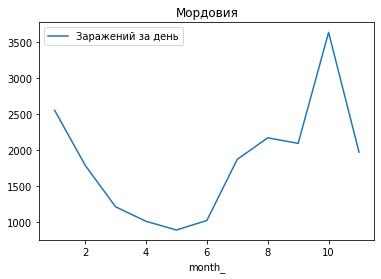

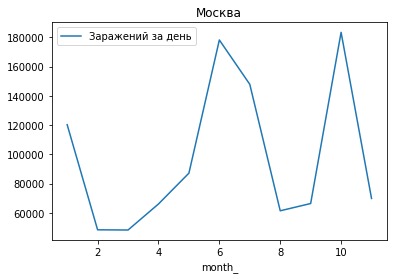

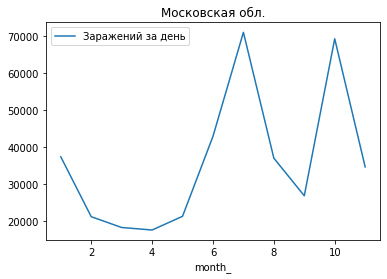

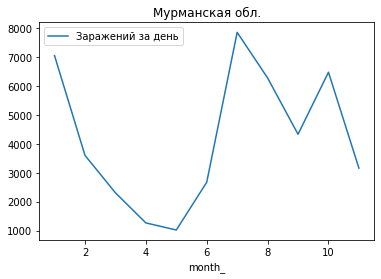

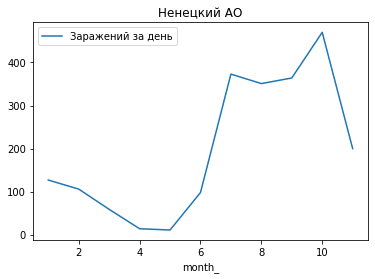

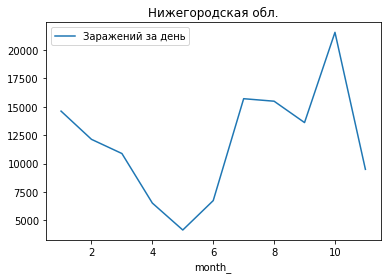

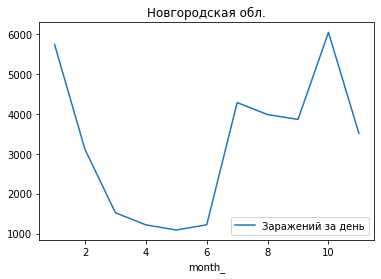

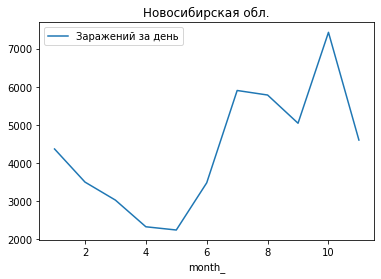

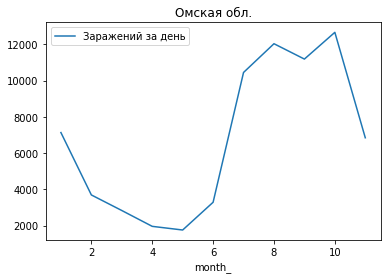

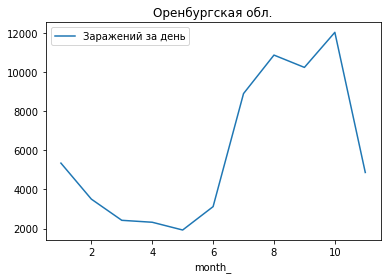

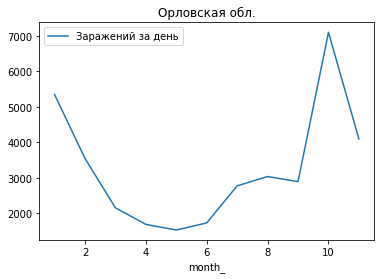

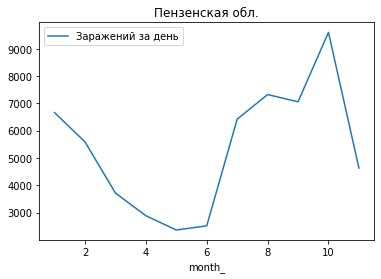

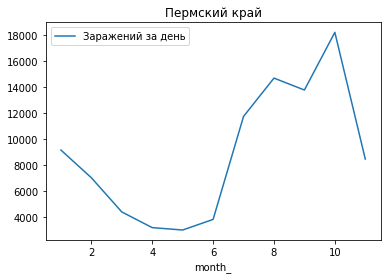

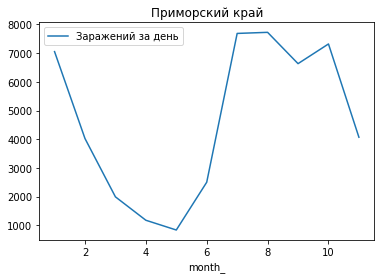

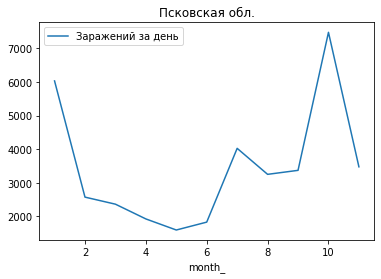

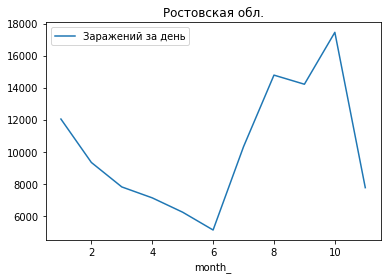

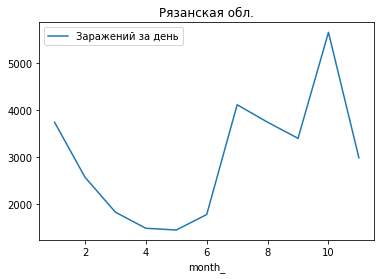

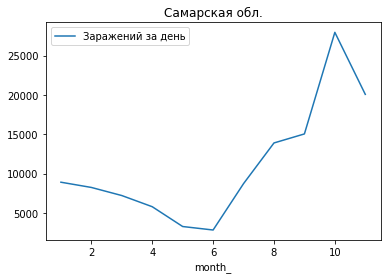

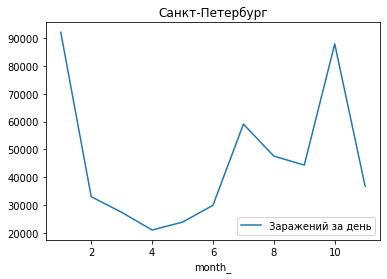

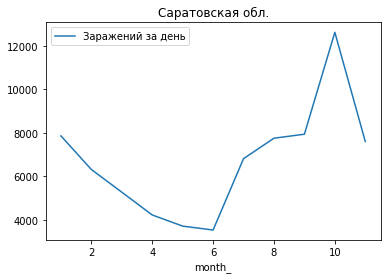

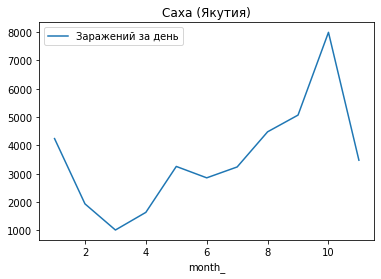

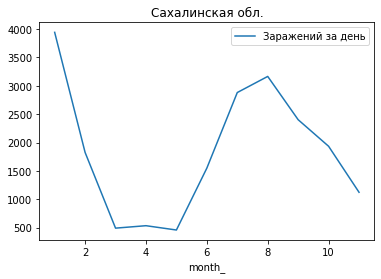

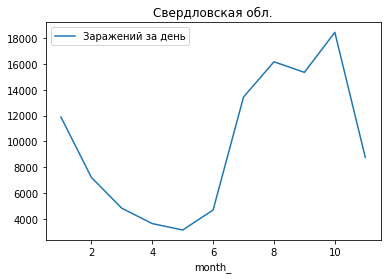

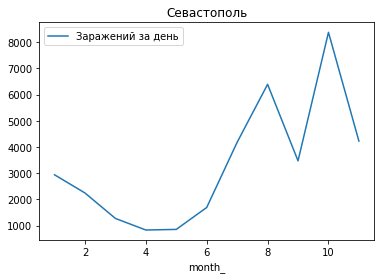

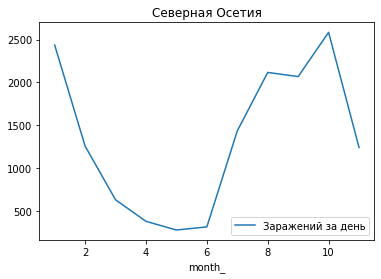

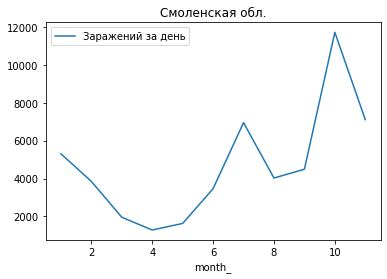

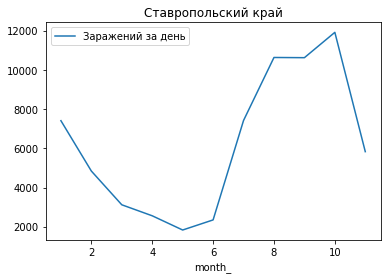

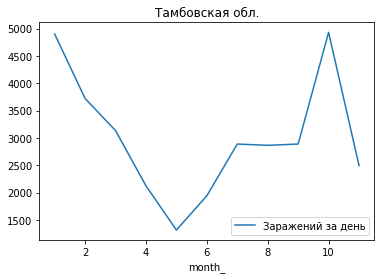

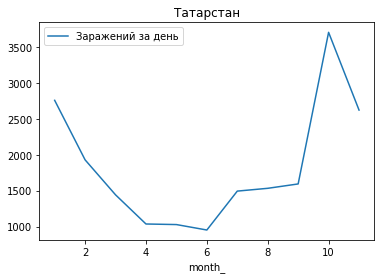

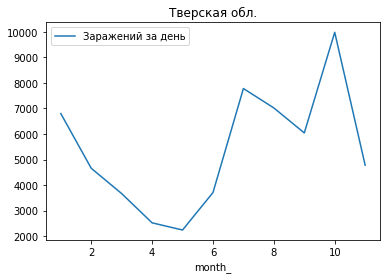

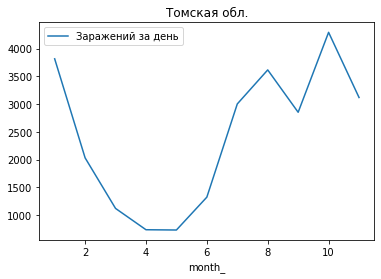

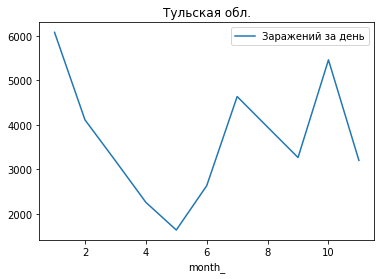

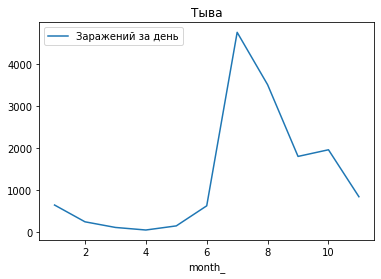

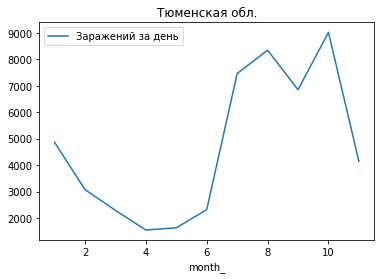

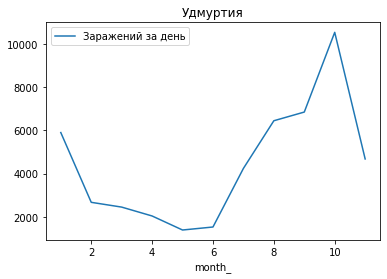

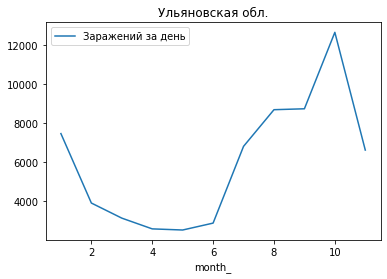

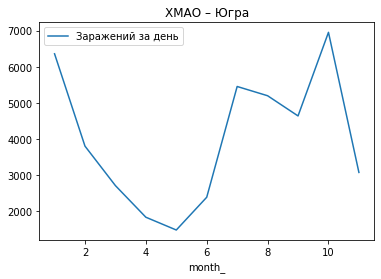

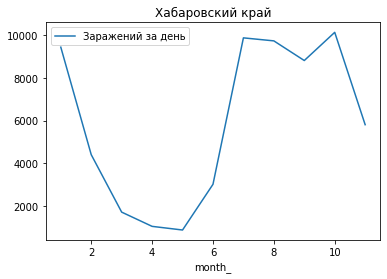

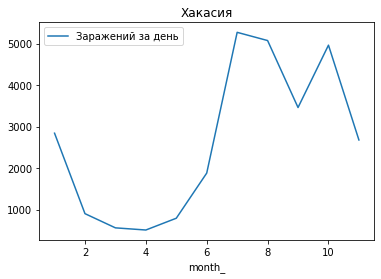

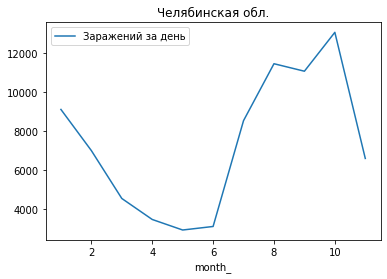

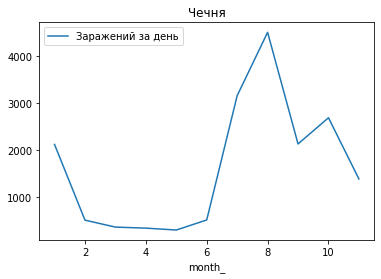

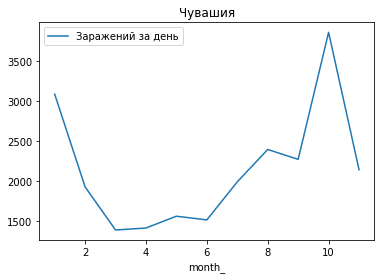

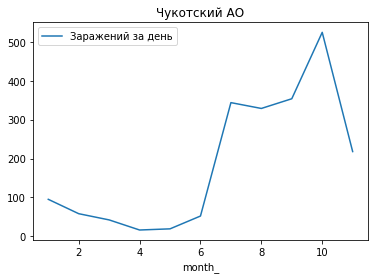

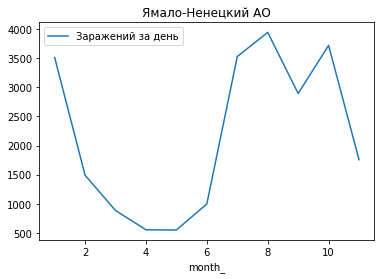

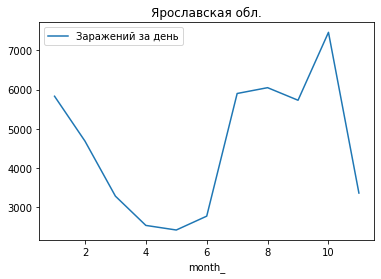

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
covid_s = covid.groupby(['Регион', 'month_'], as_index=False).sum()
for region_name, tmp_covid in covid_s.groupby('Регион'):
    tmp_covid = tmp_covid.sort_values('month_')
#     tmp_covid = covid_s.query('Регион == @region_name')[['Заражений за день', 'month_']]
    tmp_covid.index = tmp_covid['month_']
    tmp_covid['Заражений за день'].plot()
    plt.title(region_name)
    plt.legend()
    plt.show()

In [68]:
tmp_covid

,Заражений за день,month_
month_,,
1,197,1
1,195,1
1,193,1
1,206,1
1,210,1
...,...,...
11,508,11
11,498,11
11,478,11
